In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
import seaborn as sns
import warnings
from scipy.stats import entropy
from sklearn.cluster import DBSCAN

warnings.filterwarnings("ignore")
import os
import glob


import pandas as pd
import warnings

warnings.filterwarnings("ignore")

def add_datetime_features(df_extract):
    """
    Add datetime-related features to the dataframe.
    
    Parameters:
    - df_extract: DataFrame to which the datetime features will be added.
    
    Returns:
    - DataFrame with added datetime features.
    """
    df_extract['DoW'] = df_extract.index.day_name()
    df_extract['Month'] = df_extract.index.month
    df_extract['Date'] = df_extract.index.strftime('%Y/%m/%d')
    df_extract['Hour'] = df_extract.index.hour
    df_extract['Minute'] = df_extract.index.minute
    df_extract['Week'] = df_extract.index.strftime('%U').astype(int)
    
    return df_extract

def getDF(df_raw, featurename):
    """
    Extract the specified feature and datetime-related features from the dataframe.
    
    Parameters:
    - df_raw: Raw DataFrame to extract from.
    - featurename: Name of the feature/column to be extracted.
    
    Returns:
    - DataFrame with extracted feature and added datetime features.
    """
    df_extract = df_raw[[featurename]].copy()

    if 'Time' in df_raw.columns:
        df_extract.index = pd.to_datetime(df_raw["Time"], format='%Y-%m-%d %H:%M:%S')
        
    return add_datetime_features(df_extract)

def getDF_bymonth(df_raw, featurename, month):
    """
    Extract the specified feature, add datetime-related features, and filter by month.
    
    Parameters:
    - df_raw: Raw DataFrame to extract from.
    - featurename: Name of the feature/column to be extracted.
    - month: Month to filter the data.
    
    Returns:
    - Filtered DataFrame with extracted feature and added datetime features.
    """
    df_extract = getDF(df_raw, featurename)
    return df_extract[df_extract['Month'] == month]


# Compute timeseries statistics and plot for individual patients

Patient ID:  0
          glucose                                                         
            count        mean        std   min    25%    50%    75%    max
DoW                                                                       
Friday     6064.0  139.192282  52.810582  40.0  104.0  129.0  162.0  374.0
Monday     6245.0  138.121697  43.709240  53.0  111.0  130.0  159.0  400.0
Saturday   6270.0  135.444338  48.406893  40.0  102.0  126.0  158.0  369.0
Sunday     6246.0  133.656740  45.734108  40.0  101.0  125.0  158.0  368.0
Thursday   6443.0  133.434115  45.203807  42.0  102.0  125.0  159.0  400.0
Tuesday    6137.0  136.244419  44.355962  43.0  108.0  128.0  157.0  382.0
Wednesday  6320.0  139.020886  51.722342  43.0  105.0  128.0  160.0  400.0


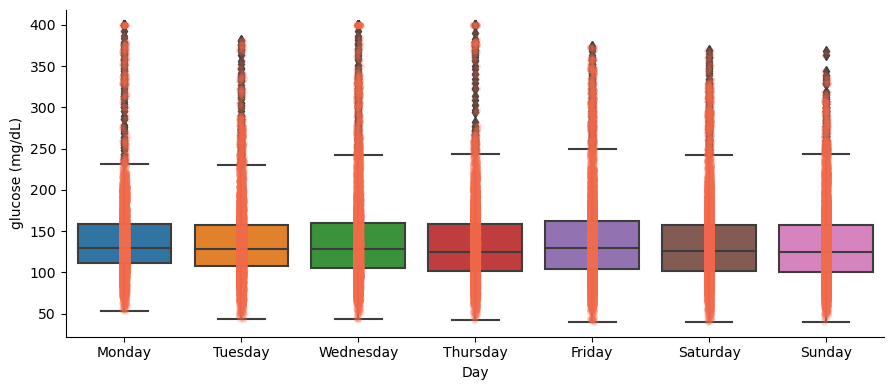

     glucose                                                         
       count        mean        std   min    25%    50%    75%    max
Hour                                                                 
0     1849.0  151.741482  50.531870  61.0  117.0  143.0  173.0  379.0
1     1856.0  150.241379  54.659662  43.0  113.0  137.0  173.0  384.0
2     1872.0  143.645299  58.505823  54.0  107.0  124.0  158.0  386.0
3     1859.0  138.420118  58.904252  42.0  103.0  119.0  150.0  393.0
4     1870.0  130.852941  56.921386  42.0   98.0  116.0  140.0  400.0
5     1868.0  118.770878  44.078629  43.0   93.0  109.0  130.0  400.0
6     1877.0  120.864145  34.035495  41.0   98.0  114.0  138.0  282.0
7     1851.0  120.752566  39.919599  42.0   95.0  113.0  136.0  339.0
8     1848.0  126.331710  44.262052  51.0   98.0  116.0  143.0  369.0
9     1832.0  125.518013  42.075012  43.0  100.0  118.0  140.0  400.0
10    1821.0  133.314113  42.441675  45.0  104.0  127.0  153.0  400.0
11    1801.0  143.13

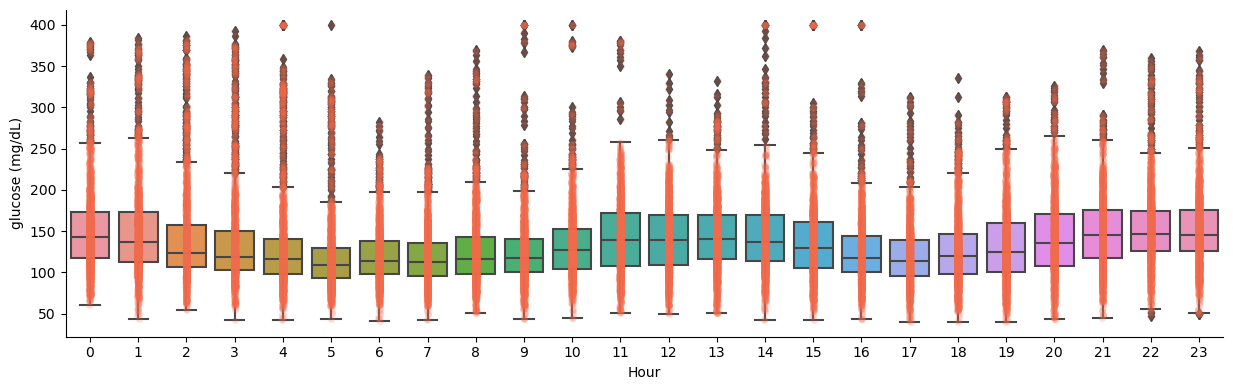

      glucose                                                         
        count        mean        std   min    25%    50%    75%    max
Month                                                                 
3      8691.0  157.055920  62.909310  40.0  113.0  145.0  186.0  400.0
4      8468.0  136.520194  44.580015  40.0  105.0  129.0  161.0  361.0
5      8589.0  131.537315  38.225880  43.0  106.0  125.0  151.0  369.0
6      8413.0  124.998930  37.898604  41.0  100.0  117.0  143.0  384.0
7      8405.0  132.676740  43.944224  40.0  103.0  126.0  155.0  386.0
8      1159.0  127.337360  37.796577  60.0  100.0  115.0  151.0  235.0


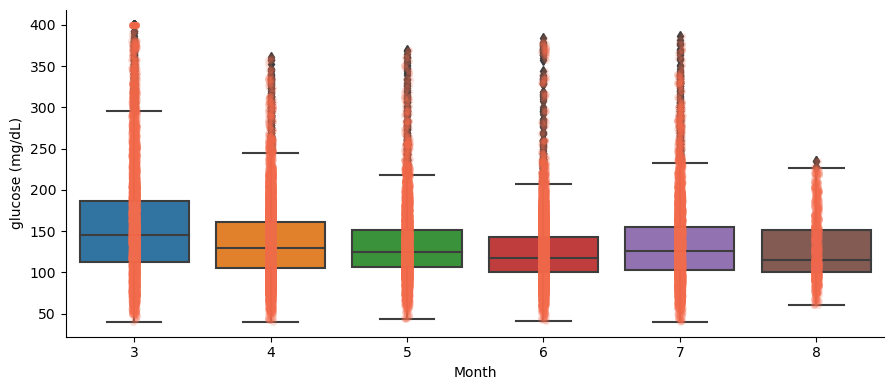

         glucose                                                           
           count        mean        std   min     25%    50%     75%    max
Dateonly                                                                   
1         1673.0  122.692767  41.025244  52.0   95.00  114.0  140.00  336.0
2         1723.0  129.280905  45.825377  40.0  101.00  116.0  147.50  307.0
3         1700.0  139.891765  43.979382  60.0  107.00  131.0  164.25  330.0
4         1587.0  133.901071  37.966796  49.0  105.00  125.0  158.00  267.0
5         1373.0  131.256373  38.727893  43.0  104.00  123.0  154.00  264.0
6         1399.0  128.254467  45.358920  42.0   98.00  120.0  148.00  299.0
7         1421.0  135.441239  46.777314  46.0  101.00  126.0  164.00  337.0
8         1397.0  130.526127  44.693098  43.0   99.00  125.0  156.00  313.0
9         1397.0  146.891195  62.173949  50.0  108.00  132.0  167.00  374.0
10        1427.0  138.128942  46.492457  53.0  106.00  131.0  159.00  329.0
11        13

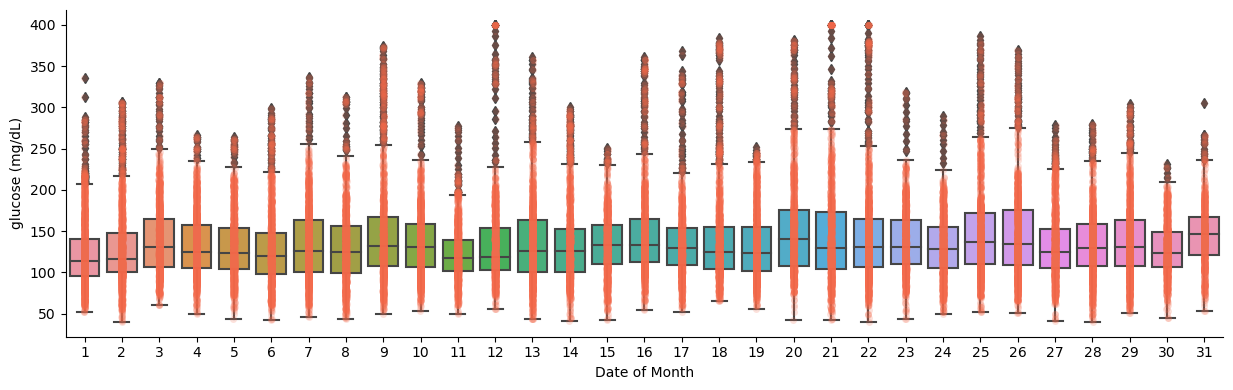

Patient ID:  1
           glucose                                                         
             count        mean        std   min    25%    50%    75%    max
DoW                                                                        
Friday     17782.0  145.427286  51.716607  49.0  107.0  136.0  173.0  400.0
Monday     17001.0  153.808247  55.734045  43.0  111.0  144.0  189.0  346.0
Saturday   17219.0  152.481096  59.783476  43.0  107.0  139.0  186.0  386.0
Sunday     16812.0  153.320426  56.028698  44.0  112.0  141.0  183.0  372.0
Thursday   17838.0  143.018500  53.518308  42.0  104.0  134.0  172.0  400.0
Tuesday    17809.0  143.208939  53.015775  41.0  105.0  134.0  171.0  383.0
Wednesday  18096.0  148.511605  56.097783  43.0  106.0  140.0  177.0  400.0


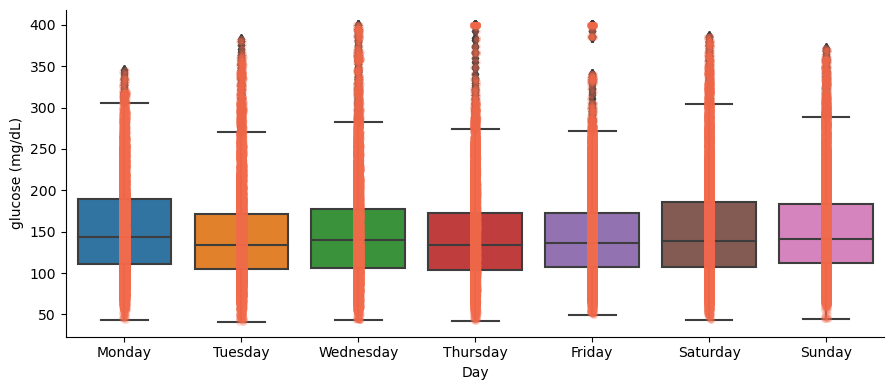

     glucose                                                         
       count        mean        std   min    25%    50%    75%    max
Hour                                                                 
0     5072.0  157.178825  54.229823  44.0  116.0  150.0  192.0  392.0
1     5070.0  149.685010  50.459878  41.0  112.0  141.0  179.0  400.0
2     5057.0  145.067036  50.303423  42.0  107.0  138.0  173.0  400.0
3     5053.0  136.729666  50.342085  43.0  100.0  126.0  166.0  395.0
4     5034.0  140.280294  47.340852  51.0  105.0  132.0  167.0  400.0
5     5010.0  135.971257  46.745536  55.0  102.0  128.0  162.0  400.0
6     5059.0  133.981419  44.741908  52.0  103.0  126.0  157.0  400.0
7     5287.0  127.951012  45.184685  43.0   96.0  120.0  150.0  399.0
8     5150.0  136.893204  50.870823  43.0  100.0  128.0  165.0  341.0
9     5093.0  155.089731  60.100770  47.0  111.0  142.0  186.0  383.0
10    5118.0  160.089097  64.810210  44.0  112.0  145.0  193.0  392.0
11    5089.0  162.77

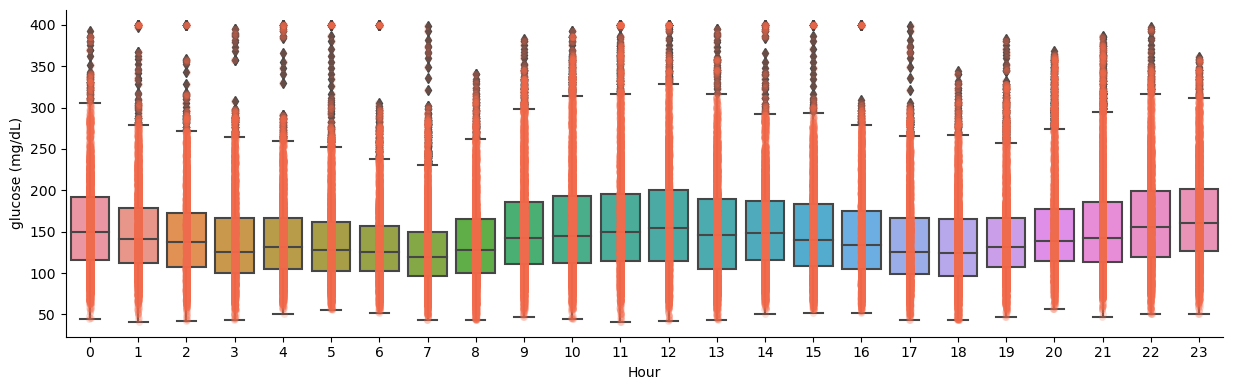

       glucose                                                         
         count        mean        std   min    25%    50%    75%    max
Month                                                                  
1        649.0  144.252696  38.519767  66.0  109.0  154.0  174.0  213.0
2      15077.0  148.979373  56.302389  47.0  107.0  139.0  179.0  400.0
3      17472.0  151.892113  61.317874  43.0  107.0  139.0  181.0  400.0
4      17637.0  159.131768  58.887618  42.0  114.0  148.0  192.0  400.0
5      18784.0  161.381708  59.452014  43.0  116.0  151.0  196.0  386.0
6      17760.0  144.088682  49.121802  41.0  108.0  137.0  171.0  329.0
7      17806.0  149.296473  49.042276  46.0  112.0  143.0  181.0  346.0
8      17372.0  123.421886  42.131522  44.0   93.0  115.0  144.0  338.0


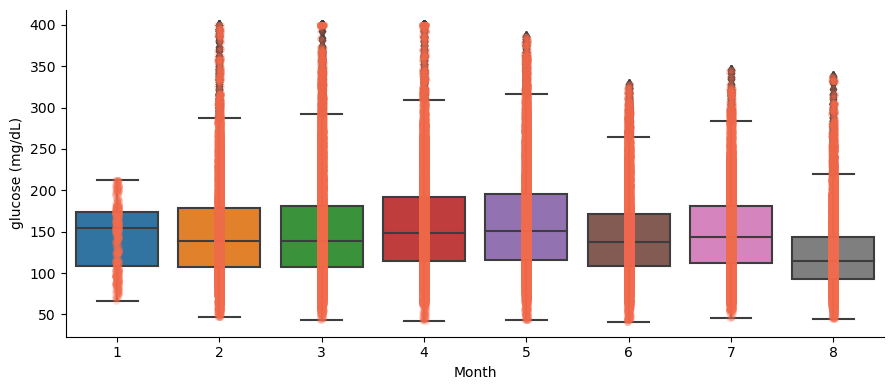

         glucose                                                           
           count        mean        std   min     25%    50%     75%    max
Dateonly                                                                   
1         4221.0  146.693201  50.780934  59.0  108.00  137.0  178.00  304.0
2         3982.0  148.017830  49.104167  49.0  109.25  141.0  182.00  279.0
3         3866.0  156.952406  62.448300  46.0  110.00  145.0  187.00  398.0
4         3835.0  164.398175  61.737626  57.0  115.00  154.0  198.00  379.0
5         3995.0  167.435044  64.086954  47.0  121.00  161.0  202.00  400.0
6         4000.0  153.107250  60.068838  51.0  110.00  139.0  186.00  381.0
7         4009.0  150.907458  59.376523  43.0  109.00  141.0  178.00  400.0
8         4011.0  149.915482  53.856585  58.0  107.00  140.0  182.00  318.0
9         3894.0  138.565485  55.370324  51.0  102.00  124.0  161.00  362.0
10        3999.0  140.970493  48.513740  54.0  105.00  136.0  169.00  324.0
11        42

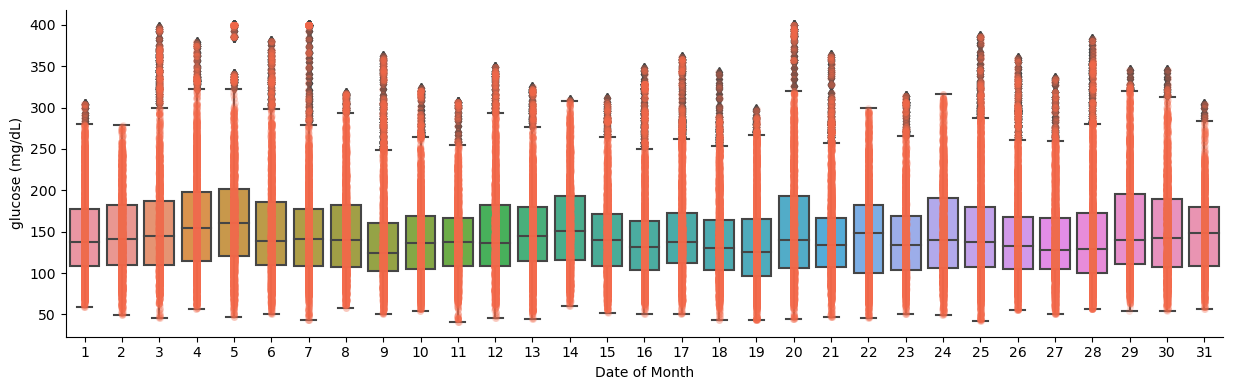

Patient ID:  2
           glucose                                                        
             count        mean        std   min   25%    50%    75%    max
DoW                                                                       
Friday     26698.0  114.802569  37.999370  40.0  88.0  108.0  134.0  317.0
Monday     26525.0  118.520980  41.223718  40.0  90.0  111.0  137.0  328.0
Saturday   26395.0  115.808562  38.372719  40.0  89.0  110.0  135.0  337.0
Sunday     26425.0  118.047985  41.859566  40.0  89.0  111.0  138.0  357.0
Thursday   26687.0  116.214899  37.052438  40.0  90.0  111.0  135.0  317.0
Tuesday    25689.0  115.351279  40.985812  40.0  87.0  107.0  134.0  364.0
Wednesday  26320.0  117.316071  40.102230  40.0  89.0  110.0  137.0  400.0


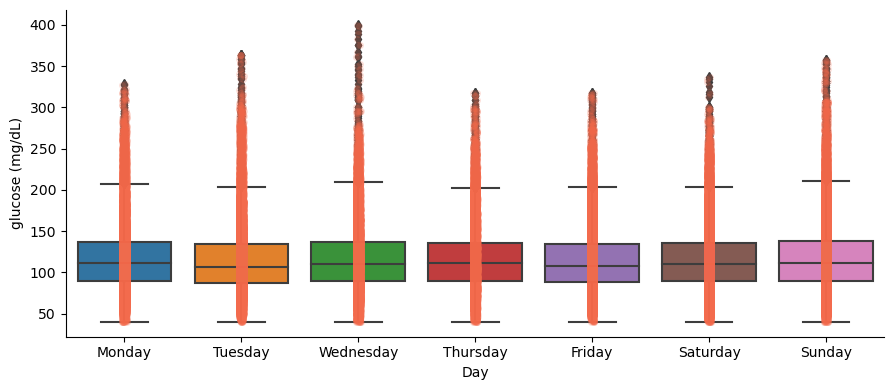

     glucose                                                         
       count        mean        std   min    25%    50%    75%    max
Hour                                                                 
0     7468.0  116.705276  41.000541  40.0   87.0  108.5  137.0  324.0
1     7537.0  121.941223  43.189393  40.0   91.0  114.0  144.0  320.0
2     7579.0  124.859348  45.730628  40.0   93.0  116.0  149.0  400.0
3     7582.0  119.930229  45.731366  40.0   88.0  110.0  143.0  320.0
4     7709.0  115.540537  44.308126  40.0   85.0  107.0  135.0  389.0
5     7781.0  117.914921  42.582196  40.0   89.0  110.0  136.0  392.0
6     7871.0  124.724050  41.055915  40.0   96.0  118.0  146.0  357.0
7     7869.0  130.906087  43.461577  40.0  101.0  122.0  153.0  357.0
8     7879.0  127.444980  45.680133  40.0   94.0  120.0  151.0  355.0
9     7883.0  115.868197  44.051385  40.0   85.0  109.0  136.0  364.0
10    7863.0  108.008521  39.255149  40.0   81.0  100.0  124.0  336.0
11    7924.0  106.00

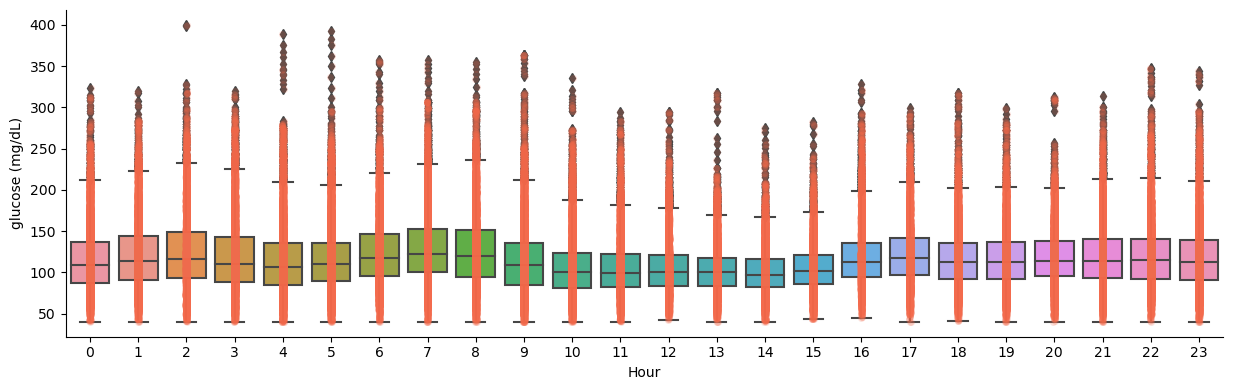

       glucose                                                        
         count        mean        std   min   25%    50%    75%    max
Month                                                                 
1      17031.0  114.054430  37.484508  40.0  88.0  107.0  133.0  325.0
2       7692.0  125.569683  43.122501  41.0  95.0  118.0  145.0  306.0
3      13693.0  124.190608  42.480757  40.0  95.0  117.0  147.0  297.0
4      15947.0  110.110616  36.086941  40.0  86.0  104.0  126.0  304.0
5      16357.0  111.710705  36.834418  40.0  85.0  105.0  131.0  400.0
6      15558.0  113.106698  42.024132  40.0  85.0  104.0  129.0  348.0
7      16728.0  114.153575  38.126750  40.0  87.0  108.0  133.0  312.0
8      15812.0  121.233557  39.357160  40.0  93.0  115.0  144.0  285.0
9      15989.0  120.012446  38.987853  40.0  94.0  114.0  141.0  357.0
10     16747.0  113.913358  37.833976  40.0  89.0  107.0  131.0  328.0
11     16228.0  117.989463  41.526613  40.0  89.0  111.0  137.0  392.0
12    

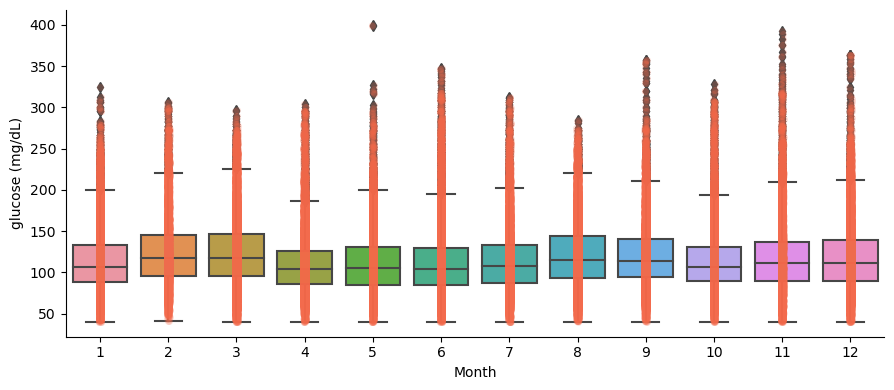

         glucose                                                         
           count        mean        std   min    25%    50%    75%    max
Dateonly                                                                 
1         5939.0  113.497053  38.567737  40.0  86.00  106.0  133.0  281.0
2         5874.0  118.730337  41.924605  40.0  88.00  109.0  141.0  307.0
3         5898.0  115.296541  38.180112  41.0  89.00  110.0  134.0  328.0
4         5687.0  112.026024  34.405412  41.0  88.00  106.0  127.0  262.0
5         5868.0  114.796694  39.125306  41.0  89.00  107.5  130.0  337.0
6         5769.0  118.201075  38.535088  40.0  92.00  113.0  135.0  278.0
7         5919.0  113.287549  38.102551  41.0  87.00  107.0  129.0  274.0
8         5800.0  121.092069  39.551061  40.0  93.00  115.0  143.0  325.0
9         5710.0  112.564974  38.784807  40.0  85.00  105.0  132.0  258.0
10        5717.0  114.667483  38.964180  40.0  86.00  109.0  134.0  280.0
11        5912.0  114.527233  34.01353

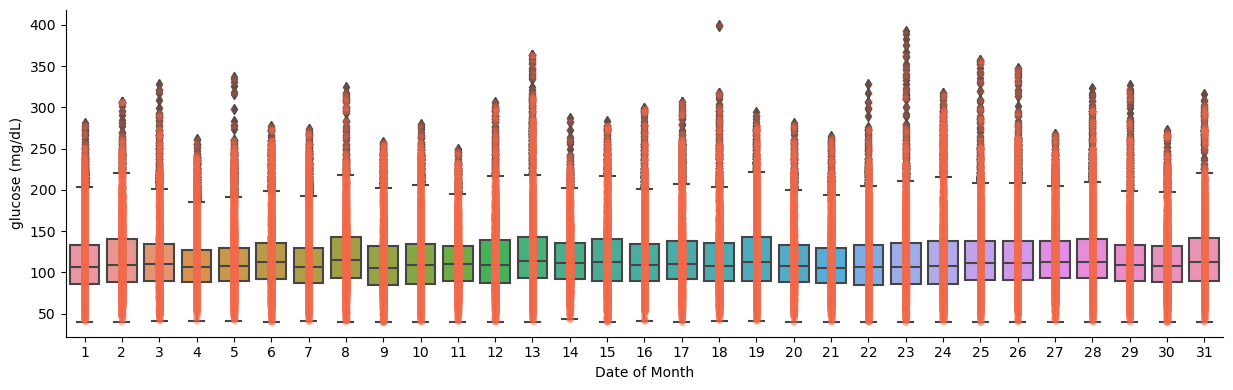

Patient ID:  3
           glucose                                                        
             count        mean        std   min   25%    50%    75%    max
DoW                                                                       
Friday     10742.0  127.627816  47.886927  40.0  92.0  120.0  154.0  355.0
Monday     10399.0  125.644197  45.625220  40.0  94.0  117.0  148.0  347.0
Saturday   10531.0  135.785395  48.913078  40.0  99.0  129.0  164.5  365.0
Sunday     10012.0  133.204954  52.773828  40.0  94.0  125.0  164.0  400.0
Thursday   10874.0  126.124057  47.921269  40.0  91.0  118.0  152.0  384.0
Tuesday    10337.0  126.894167  43.928310  40.0  94.0  120.0  152.0  307.0
Wednesday  10821.0  124.720451  44.971831  40.0  92.0  118.0  148.0  346.0


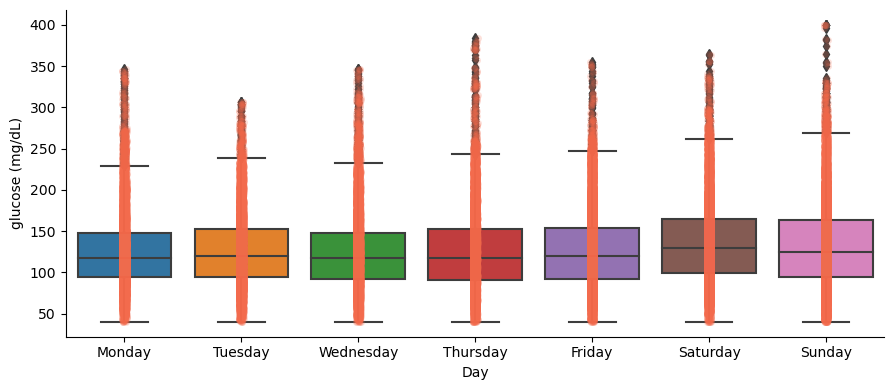

     glucose                                                         
       count        mean        std   min    25%    50%    75%    max
Hour                                                                 
0     3101.0  132.679458  50.813401  41.0   97.0  122.0  161.0  320.0
1     3082.0  130.067813  51.780060  40.0   93.0  121.0  157.0  355.0
2     3126.0  130.181382  51.345051  40.0   93.0  120.5  156.0  365.0
3     3116.0  134.048780  50.559409  40.0   97.0  125.0  161.0  343.0
4     3112.0  134.358933  49.969184  40.0   97.0  125.0  159.0  347.0
5     3126.0  129.319898  46.555952  40.0   96.0  122.0  157.0  344.0
6     3127.0  125.050847  43.482374  40.0   94.0  117.0  150.0  332.0
7     3107.0  118.245253  41.095938  40.0   91.0  110.0  135.0  314.0
8     3088.0  125.085816  44.202754  40.0   92.0  116.0  151.0  317.0
9     3067.0  133.201174  47.011875  43.0   96.0  125.0  164.0  300.0
10    3027.0  125.272877  44.825595  41.0   91.0  119.0  151.0  271.0
11    3004.0  125.51

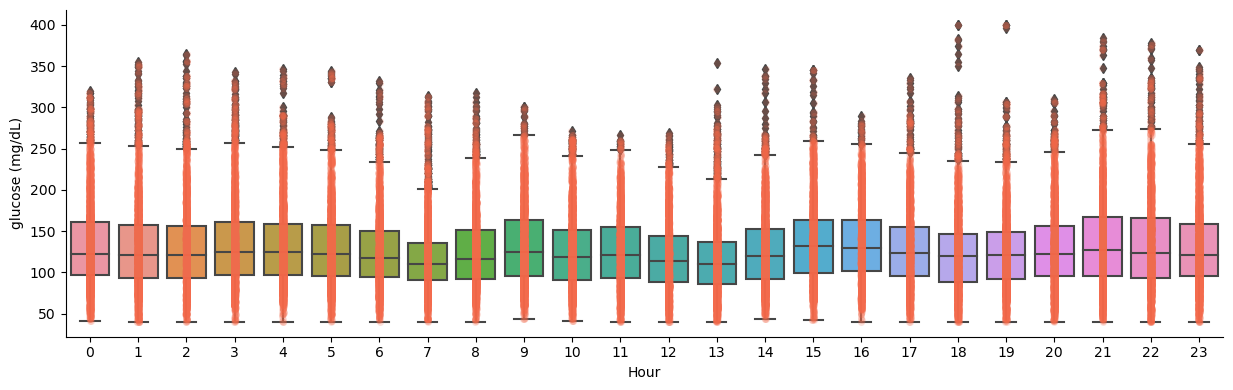

      glucose                                                         
        count        mean        std   min    25%    50%    75%    max
Month                                                                 
1      4681.0  130.267891  51.474465  40.0   92.0  121.0  159.0  316.0
2      3376.0  144.845972  54.960710  40.0  107.0  136.0  176.0  400.0
3      8460.0  128.515366  46.981814  40.0   93.0  122.0  158.0  330.0
4      7217.0  140.634197  54.600218  40.0  101.0  131.0  174.0  384.0
5      4745.0  129.795996  51.663790  40.0   93.0  120.0  157.0  346.0
6      8232.0  131.197279  53.270604  40.0   92.0  120.0  161.0  370.0
7      8543.0  122.122556  47.832505  40.0   86.0  112.0  147.0  346.0
8      8624.0  126.184717  43.798590  40.0   94.0  121.0  151.0  332.0
9      8356.0  119.430349  36.761926  40.0   93.0  115.0  140.0  284.0
10     8442.0  124.790926  38.871530  40.0   96.0  120.0  147.0  270.0
11     3040.0  129.638158  40.910306  48.0   98.0  125.0  156.0  298.0


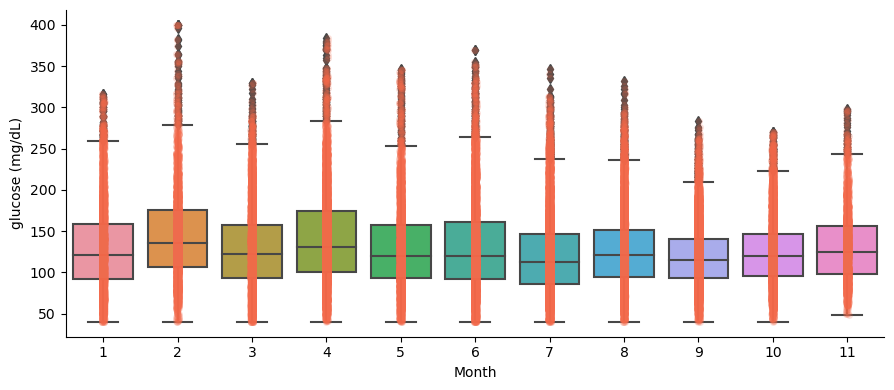

         glucose                                                         
           count        mean        std   min    25%    50%    75%    max
Dateonly                                                                 
1         2518.0  129.024623  44.305969  40.0   95.0  126.0  156.0  290.0
2         2518.0  128.698173  46.614995  40.0   93.0  121.0  154.0  320.0
3         2443.0  133.502661  51.808737  40.0   95.0  123.0  161.5  400.0
4         2550.0  126.756863  47.374112  40.0   91.0  121.0  156.0  384.0
5         2441.0  124.797214  43.782925  40.0   93.0  119.0  145.0  257.0
6         2388.0  123.172948  44.853995  44.0   89.0  116.0  147.0  370.0
7         2306.0  123.944493  45.906379  40.0   89.0  117.0  151.0  284.0
8         2455.0  132.000407  46.588328  41.0   98.0  124.0  158.0  336.0
9         2498.0  132.026021  50.178262  43.0   95.0  123.0  160.0  365.0
10        2374.0  123.236731  38.685758  45.0   96.0  120.0  147.0  354.0
11        2196.0  114.491803  42.77125

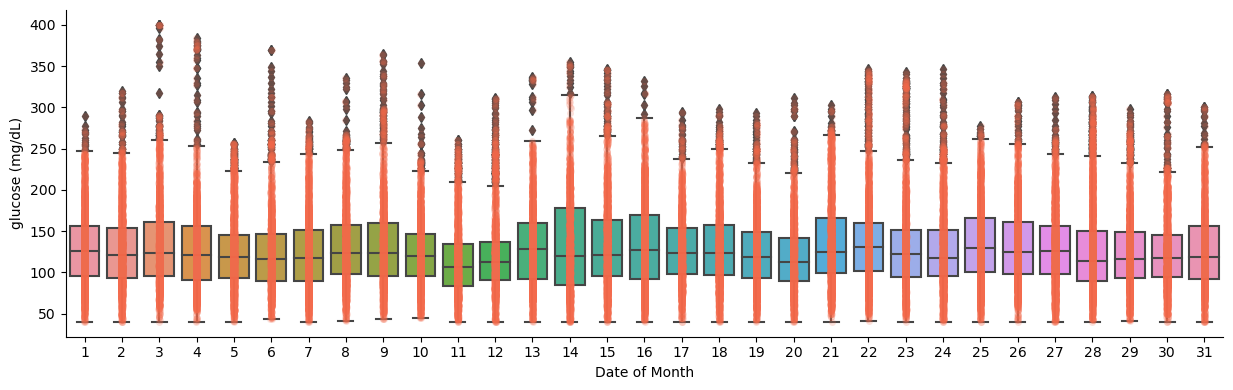

Patient ID:  4
          glucose                                                         
            count        mean        std   min    25%    50%    75%    max
DoW                                                                       
Friday     7371.0  174.603039  73.510031  49.0  121.0  156.0  211.0  400.0
Monday     7735.0  178.170136  71.568307  40.0  126.0  162.0  219.0  400.0
Saturday   6460.0  172.445201  65.854113  48.0  121.0  163.0  210.0  384.0
Sunday     7429.0  163.528066  59.609492  45.0  119.0  154.0  197.0  400.0
Thursday   7643.0  172.470496  62.464728  40.0  127.0  162.0  211.0  400.0
Tuesday    7600.0  174.793026  69.381217  50.0  121.0  160.0  211.0  400.0
Wednesday  7087.0  161.136447  54.298005  53.0  119.0  153.0  194.0  392.0


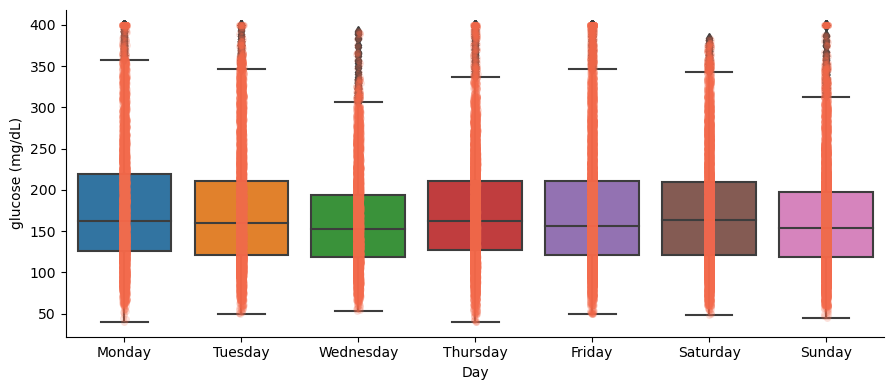

     glucose                                                           
       count        mean        std   min     25%    50%     75%    max
Hour                                                                   
0     2160.0  177.059722  69.657906  45.0  126.00  169.0  211.00  400.0
1     2167.0  182.406553  72.128754  49.0  129.00  170.0  225.00  400.0
2     2142.0  184.691410  72.564729  51.0  132.00  172.0  223.00  400.0
3     2159.0  184.455767  74.635623  51.0  130.00  167.0  227.00  400.0
4     2195.0  183.560364  75.884186  61.0  128.00  167.0  214.00  400.0
5     2183.0  180.544205  78.528823  50.0  126.00  162.0  213.00  400.0
6     2179.0  174.065626  70.851458  67.0  121.00  156.0  207.00  400.0
7     2138.0  165.733396  66.160290  59.0  118.00  151.0  193.00  400.0
8     2174.0  155.177093  60.105731  48.0  114.00  140.0  182.00  388.0
9     2179.0  145.787976  49.073089  49.0  113.00  134.0  168.00  375.0
10    2193.0  142.940264  47.855399  52.0  108.00  130.0  167.00

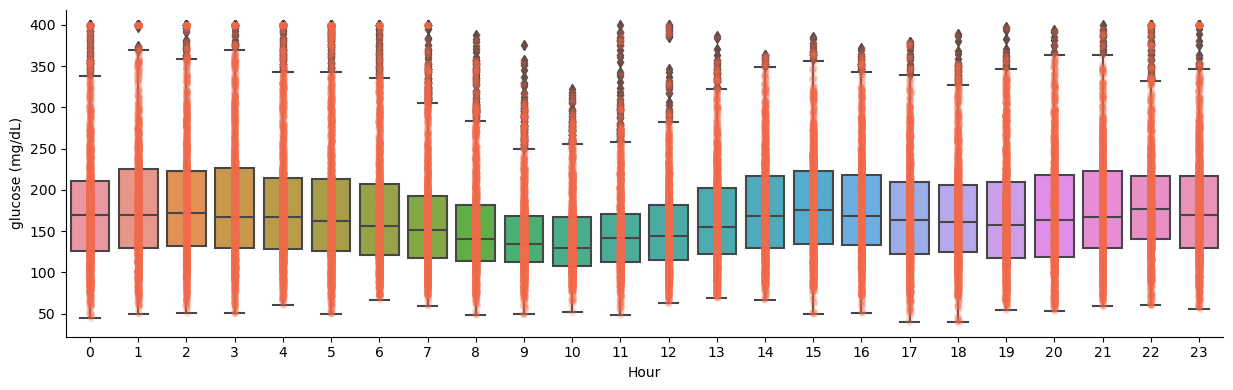

      glucose                                                         
        count        mean        std   min    25%    50%    75%    max
Month                                                                 
4      5579.0  161.135150  58.106445  50.0  116.0  150.0  197.0  394.0
5      8551.0  169.347562  65.582453  48.0  120.0  156.0  204.0  400.0
6      7600.0  183.610132  73.573573  49.0  128.0  170.0  224.0  400.0
7      8993.0  176.952963  70.059051  40.0  124.0  163.0  220.0  400.0
8      8917.0  170.294045  65.956372  56.0  122.0  157.0  206.0  400.0
9      6425.0  165.609027  62.565987  40.0  121.0  155.0  197.0  400.0
10     5260.0  164.675856  54.403321  59.0  125.0  156.0  191.0  400.0


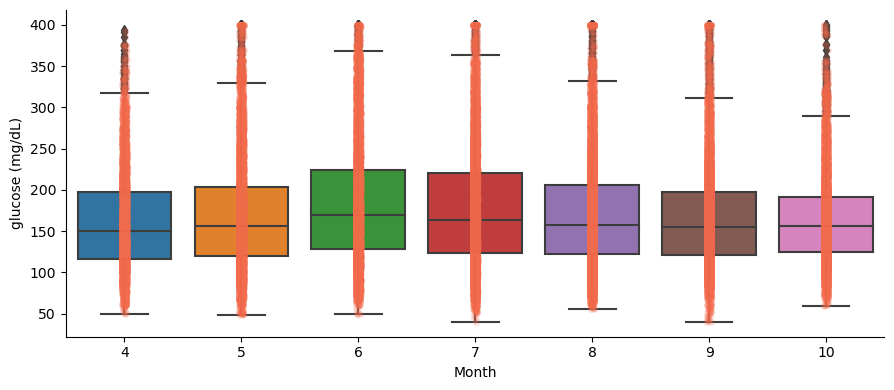

         glucose                                                           
           count        mean        std   min     25%    50%     75%    max
Dateonly                                                                   
1         1666.0  153.560624  49.349817  53.0  111.00  151.0  188.75  277.0
2         1608.0  151.559701  54.616045  48.0  118.00  141.0  176.00  400.0
3         1755.0  164.543020  55.622913  50.0  121.00  158.0  198.00  354.0
4         1639.0  155.375229  59.185106  48.0  114.00  144.0  183.00  400.0
5         1603.0  186.270742  81.701813  40.0  124.00  169.0  222.00  400.0
6         1503.0  181.077844  71.688546  67.0  125.00  162.0  223.00  400.0
7         1323.0  169.602419  63.790403  50.0  123.00  163.0  206.00  356.0
8          962.0  178.835759  69.234419  40.0  130.00  163.0  216.75  400.0
9         1260.0  175.425397  73.326909  51.0  129.75  159.0  208.00  388.0
10        2021.0  194.740228  72.036949  69.0  137.00  189.0  239.00  400.0
11        20

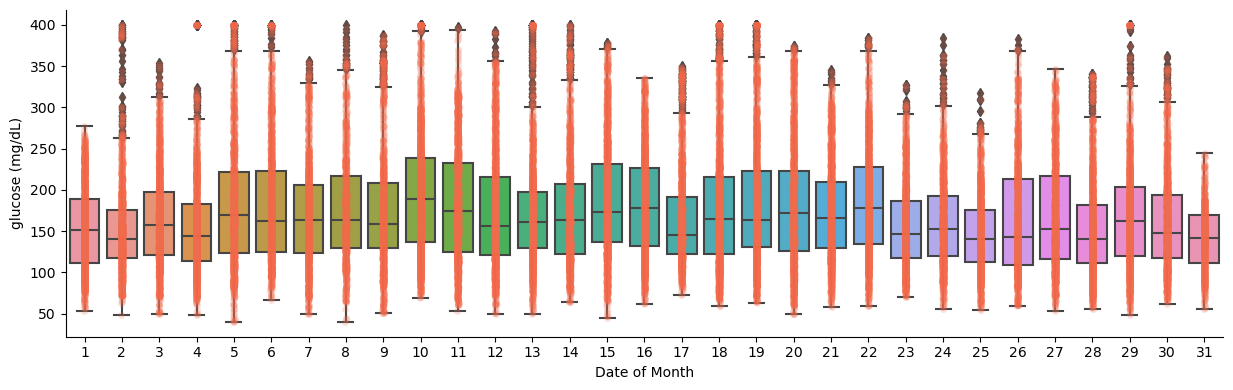

Patient ID:  5
          glucose                                                         
            count        mean        std   min    25%    50%    75%    max
DoW                                                                       
Friday     6539.0  156.547331  56.338568  40.0  115.0  143.0  193.0  400.0
Monday     5746.0  167.363209  64.817168  41.0  119.0  157.0  206.0  400.0
Saturday   6706.0  167.093797  56.831262  40.0  123.0  159.0  200.0  400.0
Sunday     6395.0  163.219390  56.703209  40.0  121.0  155.0  198.0  393.0
Thursday   6281.0  158.610253  62.929634  40.0  114.0  147.0  192.0  400.0
Tuesday    5835.0  156.126478  60.846771  40.0  111.0  142.0  190.0  381.0
Wednesday  5989.0  151.711304  54.452648  41.0  112.0  143.0  181.0  400.0


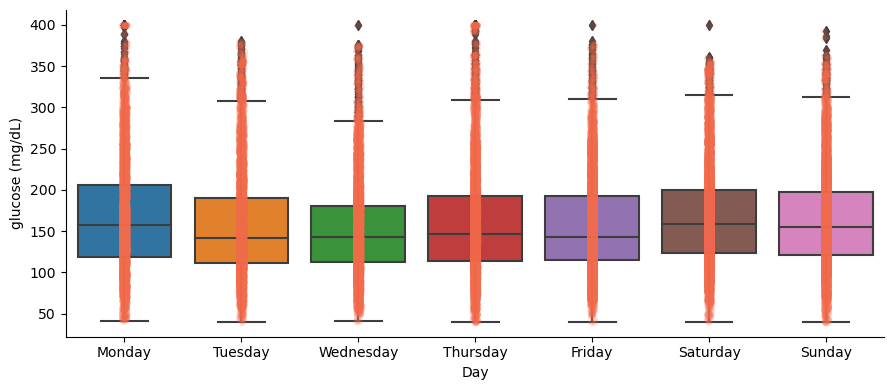

     glucose                                                          
       count        mean        std   min     25%    50%    75%    max
Hour                                                                  
0     1706.0  173.694607  63.870313  40.0  127.00  170.0  208.0  396.0
1     1777.0  182.060214  67.639897  44.0  130.00  174.0  229.0  381.0
2     1850.0  179.967027  67.257201  40.0  125.25  181.0  226.0  361.0
3     1894.0  176.666843  63.749554  49.0  121.25  175.0  225.0  400.0
4     1962.0  174.582059  64.791012  40.0  123.00  168.0  217.0  362.0
5     2007.0  169.423019  61.772271  46.0  123.00  161.0  208.0  363.0
6     2017.0  163.498265  58.999085  55.0  121.00  152.0  195.0  375.0
7     1982.0  153.991423  56.655404  55.0  113.00  144.5  181.0  363.0
8     1976.0  152.098684  52.470962  55.0  115.00  141.0  175.0  377.0
9     1995.0  147.616040  47.672150  45.0  115.00  135.0  168.5  318.0
10    1935.0  141.761757  40.215469  43.0  113.00  133.0  164.0  290.0
11    

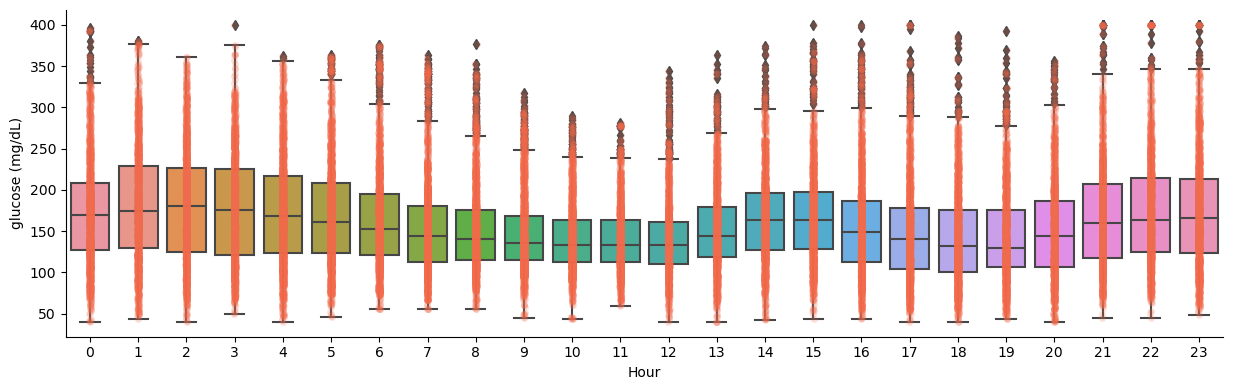

      glucose                                                         
        count        mean        std   min    25%    50%    75%    max
Month                                                                 
1      6049.0  155.607704  56.539379  43.0  113.0  146.0  190.0  400.0
2      7512.0  156.374734  51.468539  40.0  117.0  149.0  188.0  400.0
3      7995.0  162.307942  64.253594  40.0  114.0  151.0  200.0  400.0
4      4336.0  142.698109  50.601407  40.0  105.0  133.0  173.0  303.0
10     4589.0  158.518632  66.917635  43.0  106.0  145.0  196.0  378.0
11     6544.0  171.650672  62.820807  40.0  125.0  162.0  207.0  396.0
12     6466.0  167.399629  55.789405  53.0  125.0  156.0  200.0  400.0


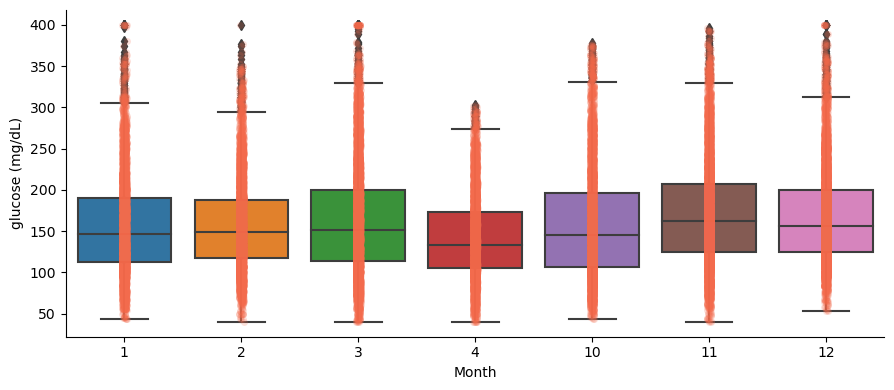

         glucose                                                          
           count        mean        std   min    25%    50%     75%    max
Dateonly                                                                  
1         1377.0  160.994190  71.308136  40.0  108.0  150.0  196.00  400.0
2         1505.0  159.554153  54.439197  50.0  119.0  148.0  197.00  338.0
3         1559.0  177.133419  67.126565  53.0  124.0  159.0  221.00  380.0
4         1536.0  184.620443  65.706641  49.0  133.0  174.0  225.00  400.0
5         1494.0  169.573628  61.117191  43.0  127.0  154.0  201.00  381.0
6         1475.0  165.495593  55.480807  55.0  128.0  158.0  200.00  378.0
7         1385.0  155.684477  53.145176  47.0  119.0  139.0  187.00  363.0
8         1514.0  140.879789  45.014385  57.0  106.0  128.0  177.00  302.0
9         1531.0  148.250163  53.612792  49.0  102.0  137.0  187.00  314.0
10        1527.0  147.428291  46.282127  45.0  110.0  142.0  179.00  276.0
11        1416.0  149.661

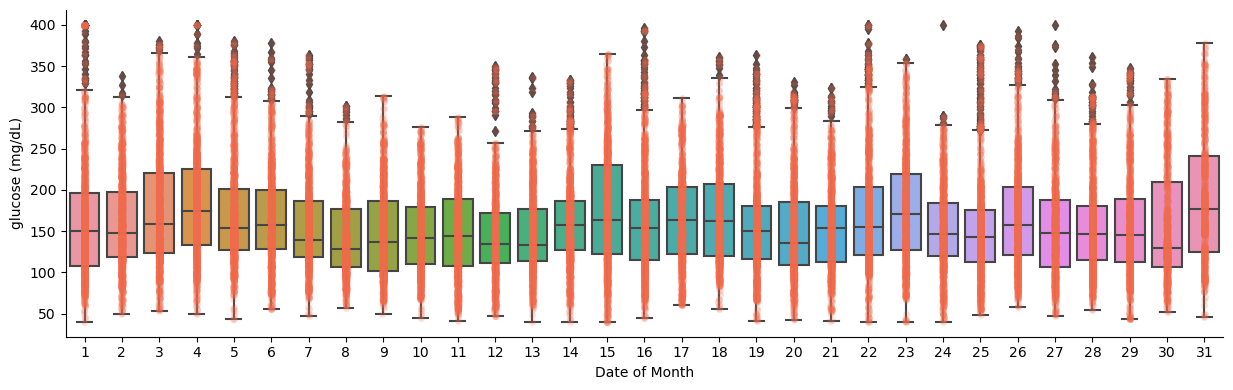

Patient ID:  6
          glucose                                                          
            count        mean        std   min    25%    50%     75%    max
DoW                                                                        
Friday     2984.0  164.295912  69.614738  42.0  111.0  153.0  207.25  400.0
Monday     3591.0  165.820941  71.518940  48.0  112.0  151.0  203.00  400.0
Saturday   3476.0  160.527043  70.009986  43.0  111.0  142.0  197.00  400.0
Sunday     4025.0  149.741366  66.127884  43.0   98.0  131.0  189.00  400.0
Thursday   3266.0  164.939375  72.684255  41.0  111.0  149.0  199.00  400.0
Tuesday    3337.0  164.269404  61.834948  56.0  113.0  152.0  208.00  400.0
Wednesday  3217.0  164.211066  65.298553  40.0  116.0  154.0  200.00  400.0


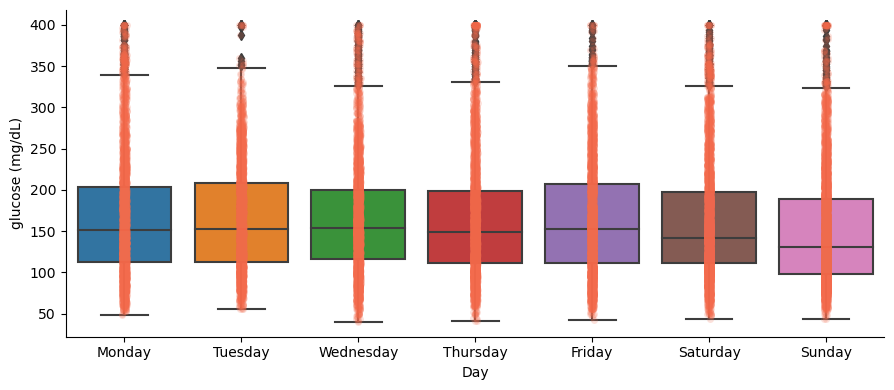

     glucose                                                          
       count        mean        std   min    25%    50%     75%    max
Hour                                                                  
0     1193.0  138.145851  51.941295  41.0  101.0  126.0  173.00  365.0
1     1211.0  130.524360  45.455655  51.0   95.5  122.0  160.00  287.0
2     1194.0  128.337521  42.836058  50.0   96.0  122.5  156.00  281.0
3     1206.0  129.761194  40.584191  49.0  100.0  122.0  153.00  265.0
4     1207.0  128.043082  38.104745  50.0  101.0  121.0  148.00  256.0
5     1203.0  131.101413  40.137758  55.0   99.0  127.0  155.00  292.0
6     1173.0  132.294118  43.135289  56.0  100.0  124.0  158.00  328.0
7     1010.0  142.423762  54.749602  56.0  102.0  127.0  171.00  374.0
8      989.0  169.637007  71.110898  65.0  111.0  150.0  213.00  400.0
9      863.0  168.373117  75.537408  47.0  107.0  152.0  218.50  400.0
10     742.0  179.382749  73.298581  48.0  121.0  176.0  224.75  400.0
11    

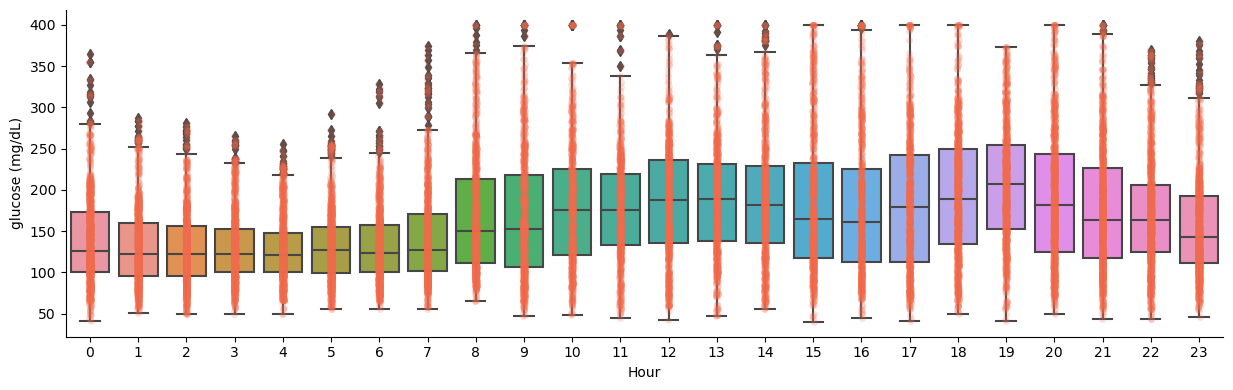

      glucose                                                           
        count        mean        std   min     25%    50%     75%    max
Month                                                                   
6      1280.0  188.653906  74.559240  41.0  142.00  184.0  226.00  400.0
7      6490.0  174.695378  72.304060  41.0  119.00  164.0  219.00  400.0
8      6412.0  160.497817  71.804561  40.0  105.00  143.0  201.00  400.0
9      6590.0  146.044613  56.019332  47.0  105.00  133.0  179.00  400.0
10      586.0  151.817406  58.433445  60.0  115.00  130.0  185.75  360.0
11     1258.0  162.326709  67.068357  43.0  110.25  152.0  207.00  357.0
12     1280.0  157.485156  67.078786  56.0  109.00  147.5  180.00  400.0


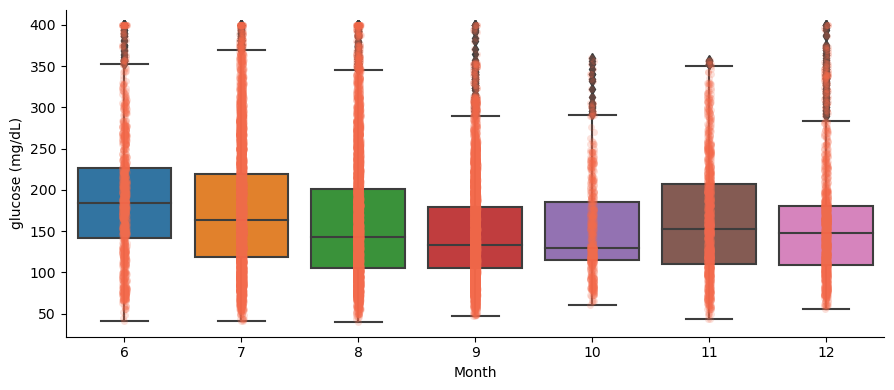

         glucose                                                           
           count        mean        std   min     25%    50%     75%    max
Dateonly                                                                   
1         1116.0  171.185484  81.801645  56.0  106.00  159.0  218.00  400.0
2         1081.0  158.109158  60.572983  48.0  115.00  150.0  195.00  374.0
3         1070.0  170.825234  78.207110  48.0  119.00  151.0  199.00  400.0
4          663.0  138.941176  54.446719  66.0  105.00  123.0  158.00  400.0
5          886.0  160.662528  74.467845  44.0  103.25  141.0  201.00  393.0
6          659.0  155.605463  64.959368  59.0  100.00  140.0  203.50  328.0
7          518.0  169.430502  62.747336  49.0  116.00  163.0  213.00  329.0
8          442.0  168.766968  62.783561  48.0  122.00  157.5  216.75  309.0
9          624.0  162.125000  73.942825  47.0  100.00  146.0  208.00  354.0
10         651.0  154.729647  63.800029  47.0  105.00  146.0  193.00  365.0
11         6

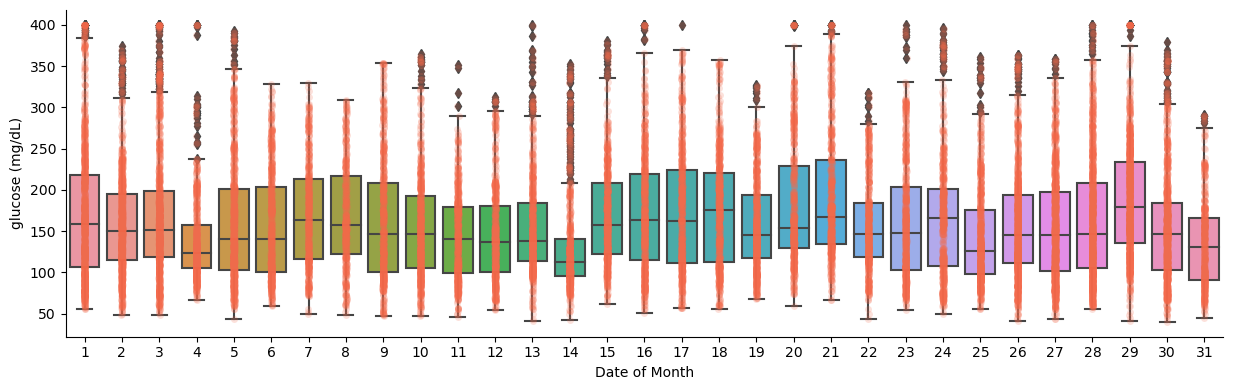

Patient ID:  7
          glucose                                                        
            count        mean        std   min   25%    50%    75%    max
DoW                                                                      
Friday     2645.0  116.922495  37.746843  40.0  91.0  113.0  141.0  317.0
Monday     2789.0  120.333811  42.314708  40.0  92.0  117.0  145.0  337.0
Saturday   2765.0  107.890778  30.709548  40.0  85.0  104.0  124.0  253.0
Sunday     2845.0  113.629174  34.072479  41.0  90.0  108.0  134.0  234.0
Thursday   2705.0  112.561553  38.261586  40.0  86.0  108.0  135.0  298.0
Tuesday    2927.0  112.270584  34.314514  40.0  87.0  112.0  133.0  245.0
Wednesday  2708.0  106.397710  32.760612  40.0  84.0  102.0  122.0  243.0


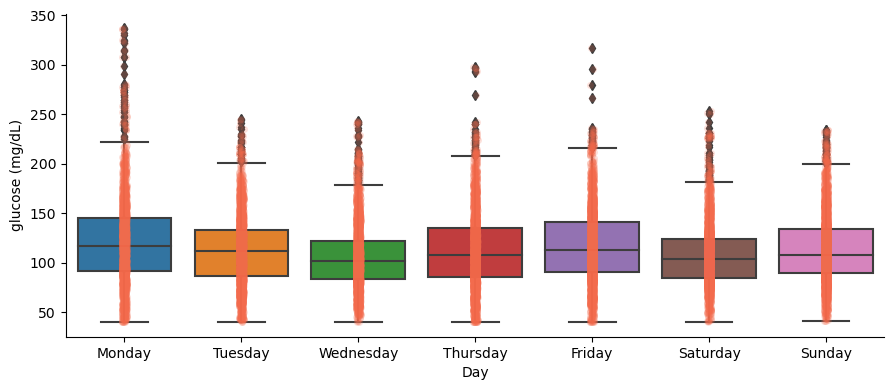

     glucose                                                          
       count        mean        std   min    25%    50%     75%    max
Hour                                                                  
0      815.0  119.326380  36.139764  48.0  89.50  116.0  144.00  214.0
1      829.0  117.739445  35.820367  47.0  92.00  112.0  140.00  317.0
2      780.0  110.011538  31.042000  40.0  88.75  110.0  129.00  217.0
3      765.0  106.516340  33.566279  40.0  79.00  107.0  129.00  218.0
4      757.0  106.988111  34.948202  40.0  78.00  110.0  130.00  217.0
5      835.0  111.444311  38.300249  40.0  81.50  109.0  143.00  234.0
6      850.0  113.882353  41.967319  40.0  78.25  108.5  144.00  253.0
7      833.0  111.906363  38.090301  40.0  86.00  106.0  134.00  251.0
8      840.0  115.419048  40.319441  40.0  84.00  109.0  142.00  235.0
9      830.0  113.033735  36.012715  40.0  88.00  109.0  139.00  243.0
10     829.0  106.091677  33.342264  40.0  85.00  100.0  123.00  228.0
11    

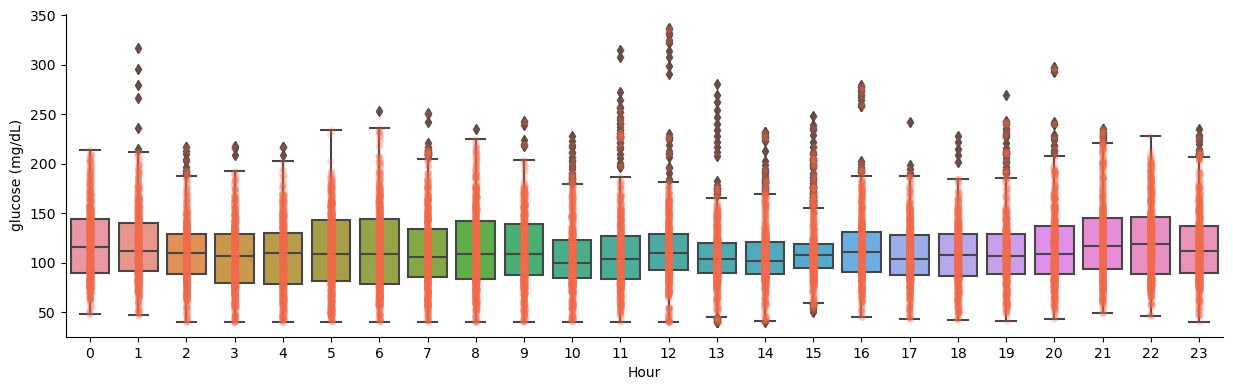

      glucose                                                        
        count        mean        std   min   25%    50%    75%    max
Month                                                                
8      6580.0  113.078875  36.973212  40.0  86.0  110.0  137.0  298.0
9      8037.0  115.654722  37.025177  40.0  90.0  111.0  135.0  337.0
10     4767.0  107.847283  32.928657  40.0  86.0  103.0  126.0  245.0


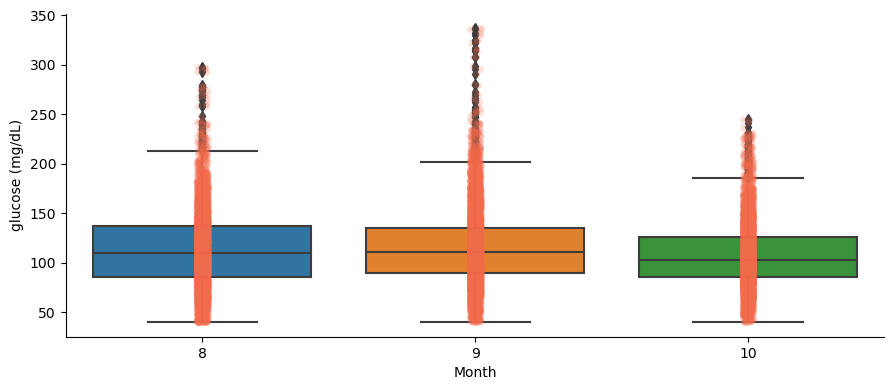

         glucose                                                          
           count        mean        std   min    25%    50%     75%    max
Dateonly                                                                  
1          467.0  121.192719  40.479599  41.0   91.5  119.0  148.00  229.0
2          551.0  113.166969  33.564230  48.0   92.0  107.0  127.00  208.0
3          561.0  106.443850  25.401296  49.0   87.0  103.0  127.00  165.0
4          551.0  115.384755  32.825944  40.0   96.0  115.0  135.50  208.0
5          621.0  110.861514  31.537896  42.0   92.0  112.0  129.00  211.0
6          778.0  113.107969  39.583822  40.0   85.0  104.0  136.00  243.0
7          822.0  117.718978  36.761305  43.0   89.0  110.5  147.00  243.0
8          783.0  103.674330  33.640265  46.0   75.0   98.0  124.00  224.0
9          768.0  104.988281  36.088131  40.0   80.0  100.0  120.00  253.0
10         778.0  112.276350  39.411919  44.0   87.0  105.0  134.00  245.0
11         758.0  103.525

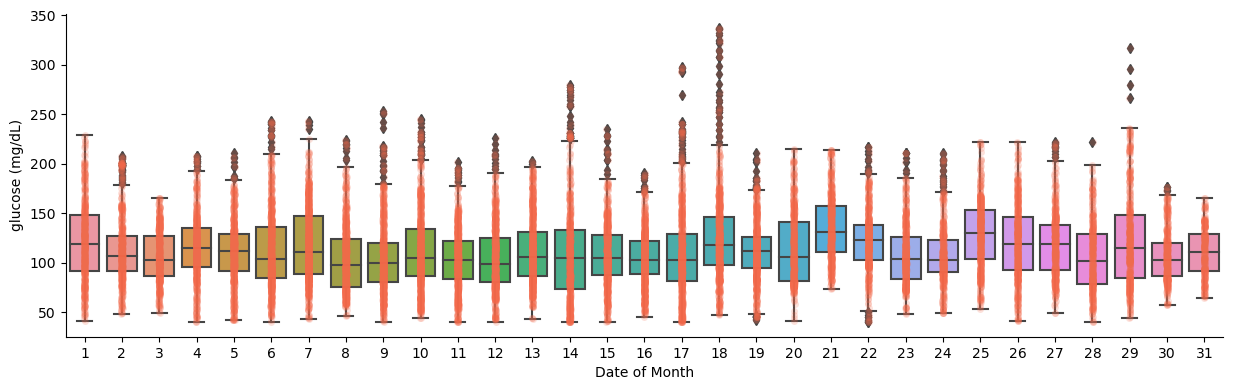

Patient ID:  8
         glucose                                                          
           count        mean        std   min    25%    50%     75%    max
DoW                                                                       
Monday     288.0  152.163194  60.296287  50.0  110.5  139.0  183.00  306.0
Saturday   288.0  111.638889  22.826145  60.0   96.0  109.0  127.25  171.0
Sunday     264.0  124.056818  40.541494  72.0   94.0  108.0  134.25  228.0
Tuesday    287.0  128.536585  28.724844  83.0  107.0  120.0  148.50  195.0


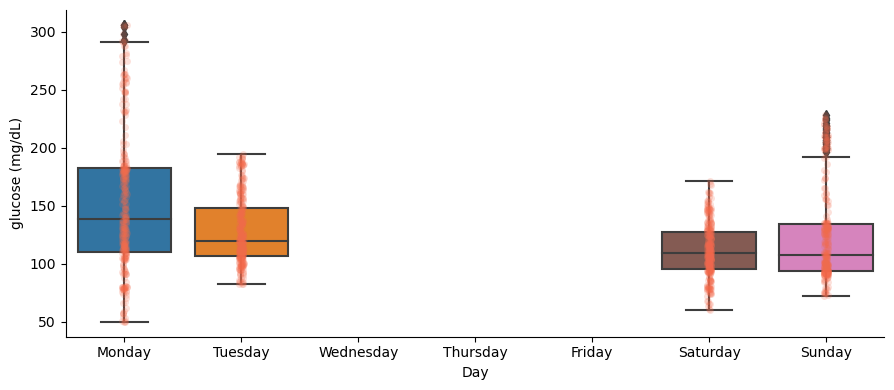

     glucose                                                            
       count        mean        std    min     25%    50%     75%    max
Hour                                                                    
0       48.0  120.041667  22.974508   75.0  103.75  123.5  137.25  154.0
1       48.0  118.645833  28.318470   77.0   95.50  116.5  144.25  162.0
2       48.0   99.416667  22.729523   72.0   78.00   92.0  122.00  141.0
3       48.0  101.958333  38.356646   50.0   63.50  116.5  131.75  162.0
4       48.0  128.083333  27.628873   59.0  114.00  127.5  140.25  174.0
5       48.0  131.333333  27.396485   80.0  121.25  134.5  150.00  177.0
6       48.0  125.770833  38.735458   77.0  100.00  121.0  145.50  203.0
7       48.0  127.791667  41.906156   91.0  100.75  108.5  134.25  228.0
8       48.0  141.062500  80.094467   83.0   90.00  103.0  143.25  306.0
9       48.0  147.520833  73.351091   90.0  102.75  109.0  152.75  306.0
10      48.0  140.187500  62.382368   90.0  103.00 

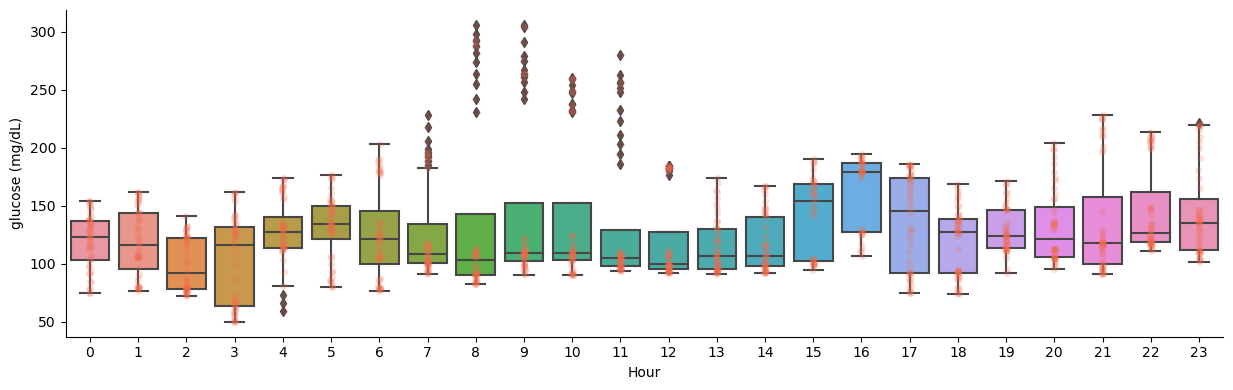

      glucose                                                         
        count        mean        std   min    25%    50%    75%    max
Month                                                                 
8      1127.0  129.206744  43.278302  50.0  100.0  117.0  147.0  306.0


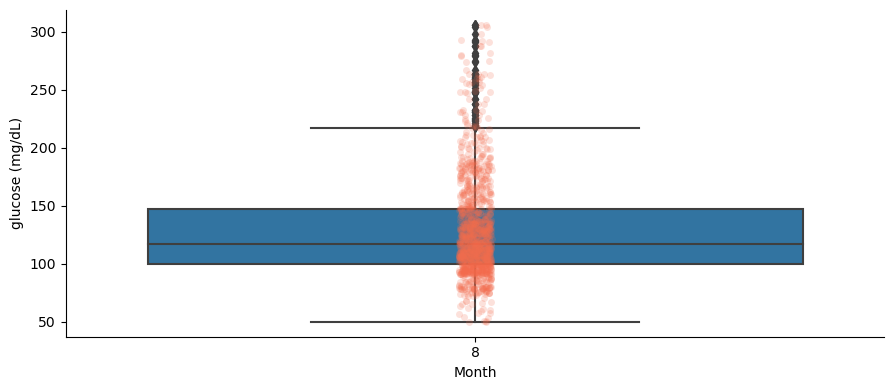

         glucose                                                          
           count        mean        std   min    25%    50%     75%    max
Dateonly                                                                  
4          288.0  111.638889  22.826145  60.0   96.0  109.0  127.25  171.0
5          264.0  124.056818  40.541494  72.0   94.0  108.0  134.25  228.0
6          288.0  152.163194  60.296287  50.0  110.5  139.0  183.00  306.0
7          287.0  128.536585  28.724844  83.0  107.0  120.0  148.50  195.0


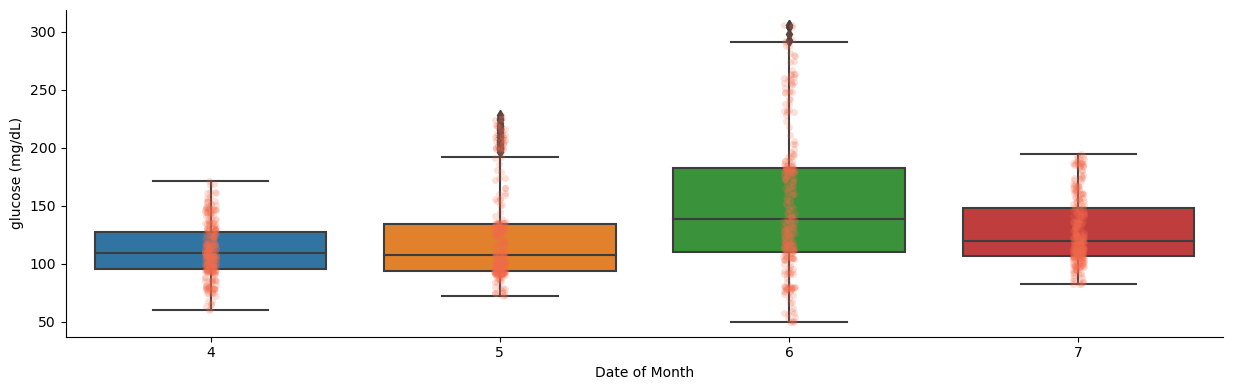

Patient ID:  9
           glucose                                                         
             count        mean        std   min    25%    50%    75%    max
DoW                                                                        
Friday     15980.0  145.949061  59.135602  40.0  101.0  132.0  181.0  400.0
Monday     15358.0  136.222946  57.569635  40.0   95.0  120.0  165.0  400.0
Saturday   15679.0  137.375789  55.797086  40.0   97.0  123.0  168.0  400.0
Sunday     15793.0  135.655354  52.609726  40.0   98.0  123.0  164.0  400.0
Thursday   16105.0  137.118224  52.602937  40.0   99.0  124.0  168.0  372.0
Tuesday    15555.0  138.209450  57.753502  40.0   96.0  124.0  169.0  400.0
Wednesday  16088.0  140.401666  56.238895  40.0   99.0  128.0  173.0  400.0


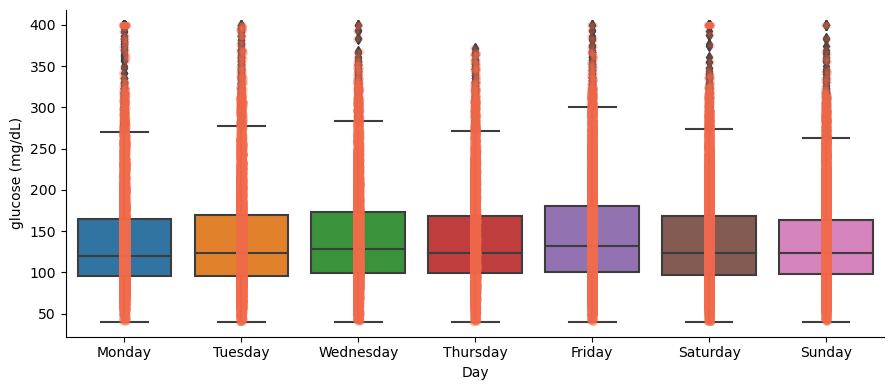

     glucose                                                           
       count        mean        std   min     25%    50%     75%    max
Hour                                                                   
0     4622.0  153.560796  59.749710  40.0  108.00  145.0  191.00  400.0
1     4580.0  150.756114  60.759312  40.0  103.00  141.0  189.25  400.0
2     4433.0  148.757049  61.998041  40.0   98.00  139.0  190.00  381.0
3     4367.0  144.183192  59.707301  40.0   97.00  137.0  182.50  391.0
4     4441.0  132.398109  52.970577  40.0   92.00  124.0  165.00  344.0
5     4517.0  124.437237  51.339497  40.0   88.00  115.0  149.00  330.0
6     4616.0  121.750000  48.490688  40.0   88.00  112.0  143.00  356.0
7     4655.0  121.910634  42.902165  40.0   95.00  113.0  142.00  398.0
8     4657.0  119.414215  38.239293  40.0   96.00  110.0  133.00  367.0
9     4664.0  116.941467  35.295636  40.0   96.00  109.0  128.00  303.0
10    4658.0  116.265994  33.609274  40.0   97.00  108.0  125.00

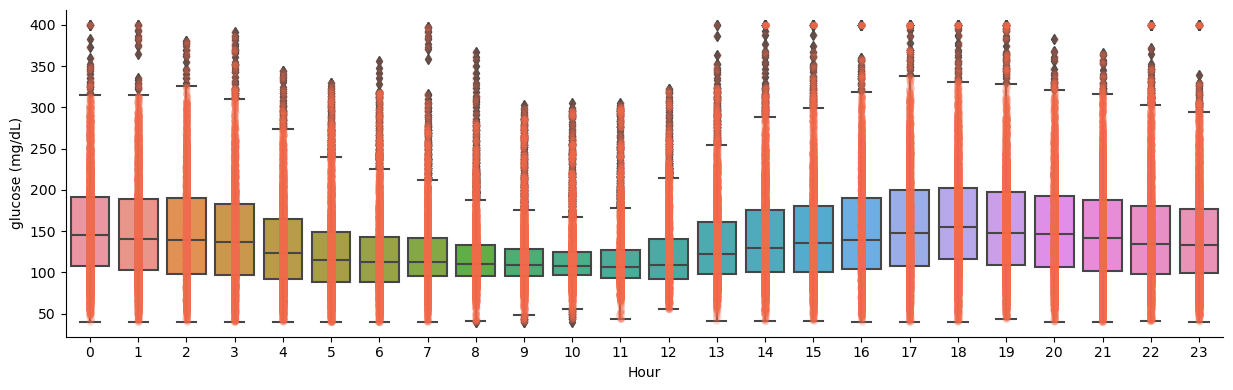

       glucose                                                         
         count        mean        std   min    25%    50%    75%    max
Month                                                                  
1       8805.0  140.184781  55.258476  40.0  100.0  126.0  169.0  325.0
2       8214.0  141.219016  51.148422  41.0  102.0  130.0  169.0  398.0
3      16842.0  122.423762  49.406903  40.0   89.0  110.0  146.0  337.0
4      13865.0  128.127443  51.503865  40.0   93.0  115.0  154.0  368.0
5       8670.0  140.484083  53.944901  40.0  101.0  127.0  171.0  355.0
6       8161.0  138.637422  55.031553  41.0   99.0  127.0  165.0  400.0
7       8783.0  137.709439  57.465438  40.0   97.0  122.0  168.0  400.0
8       8477.0  137.278282  54.082314  40.0   98.0  122.0  169.0  384.0
9       5672.0  159.798131  59.685589  43.0  114.0  147.0  200.0  344.0
10      8815.0  161.256835  64.301009  40.0  110.0  149.0  203.0  400.0
11      8382.0  146.032928  59.284912  40.0   99.0  131.0  187.0

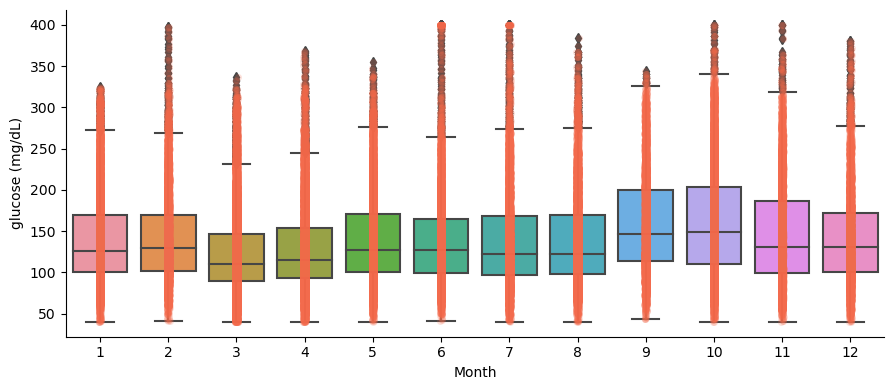

         glucose                                                         
           count        mean        std   min    25%    50%    75%    max
Dateonly                                                                 
1         3153.0  137.333968  51.432732  40.0   99.0  126.0  163.0  323.0
2         3150.0  140.349206  57.140598  40.0   98.0  124.0  173.0  381.0
3         3378.0  135.661634  55.101382  40.0   96.0  120.0  168.0  311.0
4         3389.0  131.536146  58.047666  40.0   94.0  115.0  156.0  400.0
5         3291.0  132.016408  57.237353  40.0   91.0  119.0  164.0  400.0
6         3085.0  146.461264  64.813632  41.0   95.0  129.0  188.0  337.0
7         3374.0  144.316835  54.546342  40.0  104.0  137.0  175.0  367.0
8         3407.0  134.298210  48.924358  42.0   95.0  125.0  168.0  320.0
9         3444.0  137.390244  55.125294  40.0   98.0  125.0  170.0  344.0
10        3399.0  127.179759  45.024985  40.0   95.0  116.0  149.0  295.0
11        3915.0  140.936143  60.25139

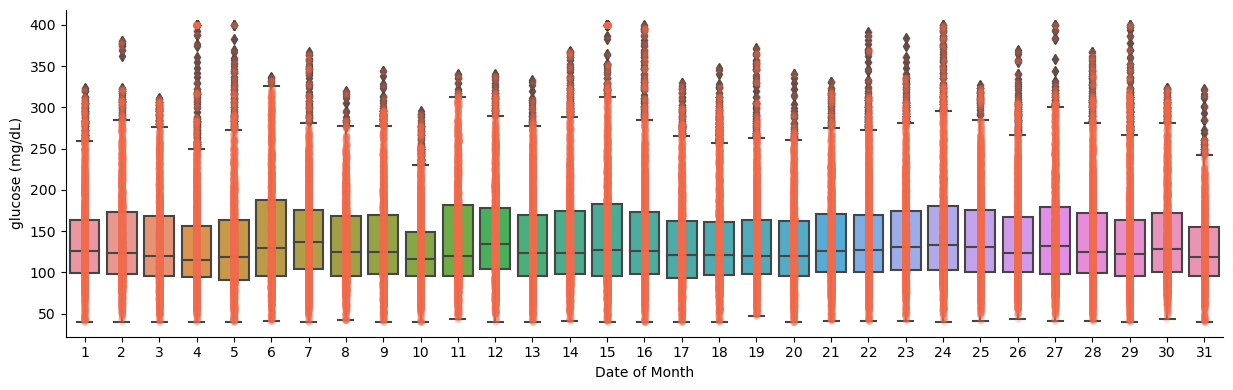

Patient ID:  10
           glucose                                                        
             count        mean        std   min   25%    50%    75%    max
DoW                                                                       
Friday     18509.0  124.924307  45.768831  40.0  92.0  114.0  149.0  396.0
Monday     19009.0  124.948288  43.355043  40.0  95.0  117.0  147.0  330.0
Saturday   18647.0  127.957580  48.935606  40.0  95.0  115.0  152.0  400.0
Sunday     18068.0  124.207328  44.952068  40.0  92.0  115.0  147.0  400.0
Thursday   19602.0  125.558872  43.300885  40.0  96.0  116.0  147.0  331.0
Tuesday    18916.0  122.182438  41.961340  40.0  94.0  114.0  140.0  349.0
Wednesday  19330.0  120.191154  40.549695  40.0  91.0  112.0  142.0  304.0


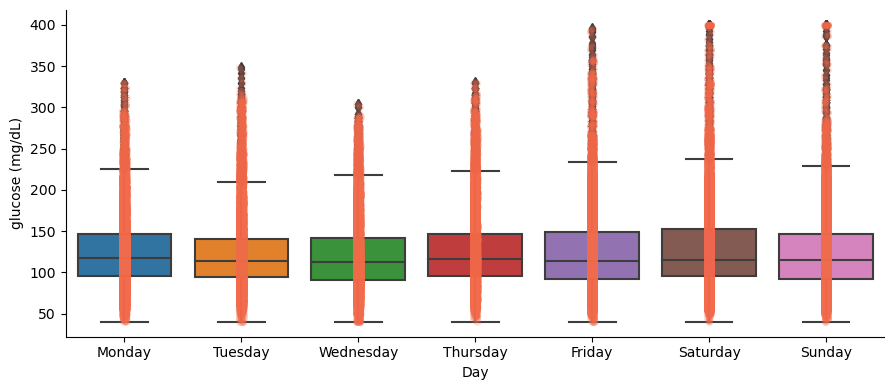

     glucose                                                          
       count        mean        std   min    25%    50%     75%    max
Hour                                                                  
0     5445.0  119.444077  41.441815  40.0   89.0  112.0  141.00  302.0
1     5500.0  120.068364  42.158268  40.0   91.0  112.0  141.00  296.0
2     5567.0  125.803664  43.449031  40.0   95.0  115.0  148.00  400.0
3     5652.0  123.858457  42.499171  40.0   95.0  114.0  144.00  400.0
4     5674.0  120.085830  40.025466  40.0   94.0  111.0  138.00  400.0
5     5663.0  116.201660  38.737502  40.0   90.0  108.0  133.00  345.0
6     5673.0  110.955227  35.765640  40.0   88.0  104.0  126.00  320.0
7     5679.0  109.445149  34.741223  40.0   87.0  103.0  123.00  311.0
8     5668.0  114.460303  33.570187  40.0   91.0  108.0  131.00  299.0
9     5680.0  115.589965  33.407282  41.0   92.0  108.0  132.25  267.0
10    5615.0  115.245414  35.082624  49.0   92.0  108.0  132.00  299.0
11    

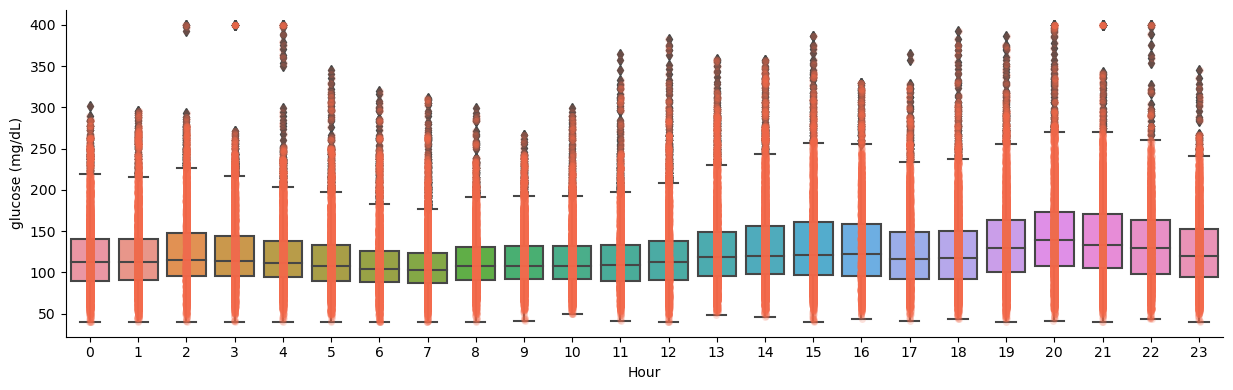

       glucose                                                          
         count        mean        std   min     25%    50%    75%    max
Month                                                                   
1       7689.0  132.280401  51.388347  40.0   95.00  119.0  159.0  400.0
2       2103.0  116.361388  33.848766  40.0   95.00  108.0  130.0  242.0
6      14097.0  133.546641  47.483422  40.0  100.00  124.0  160.0  350.0
7      16072.0  130.206508  52.843000  41.0   90.00  120.0  159.0  387.0
8      22679.0  121.225142  42.580831  40.0   92.00  112.0  142.0  400.0
9      32294.0  119.457330  41.276870  40.0   91.00  110.0  139.0  400.0
10     29871.0  121.237923  39.156415  40.0   93.00  115.0  142.0  309.0
11      7194.0  130.194051  42.371155  49.0  100.00  119.0  153.0  330.0
12        82.0  134.634146  32.646446  76.0  112.25  127.5  153.0  202.0


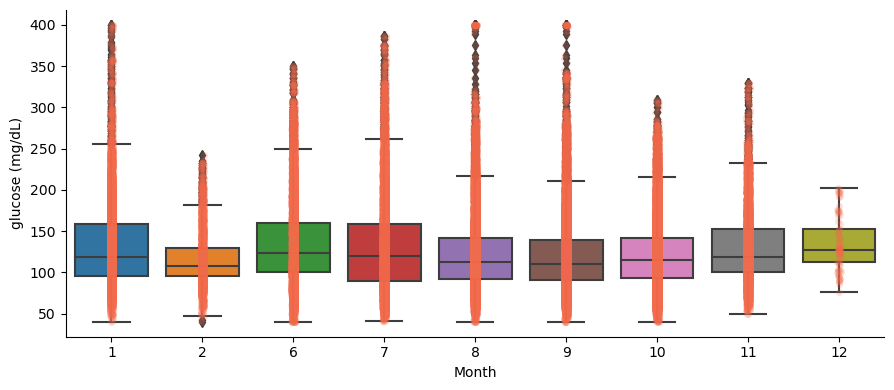

         glucose                                                         
           count        mean        std   min    25%    50%    75%    max
Dateonly                                                                 
1         4288.0  123.579291  44.078257  54.0   95.0  117.0  140.0  400.0
2         4125.0  114.730182  37.653052  40.0   86.0  107.0  135.0  260.0
3         4693.0  124.614532  40.324202  40.0   97.0  116.0  146.0  280.0
4         4761.0  127.638731  46.019572  45.0   93.0  119.0  153.0  280.0
5         4644.0  129.166236  44.908728  45.0   98.0  119.0  153.0  285.0
6         4755.0  127.024606  46.625257  48.0   93.0  118.0  150.0  343.0
7         4645.0  122.303983  41.124673  42.0   94.0  115.0  141.0  327.0
8         4724.0  127.208721  45.332914  40.0   99.0  116.0  144.0  350.0
9         4408.0  118.447368  38.251837  43.0   91.0  112.0  141.0  293.0
10        4783.0  116.326573  36.355694  45.0   90.0  109.0  138.0  258.0
11        4521.0  125.585711  43.99448

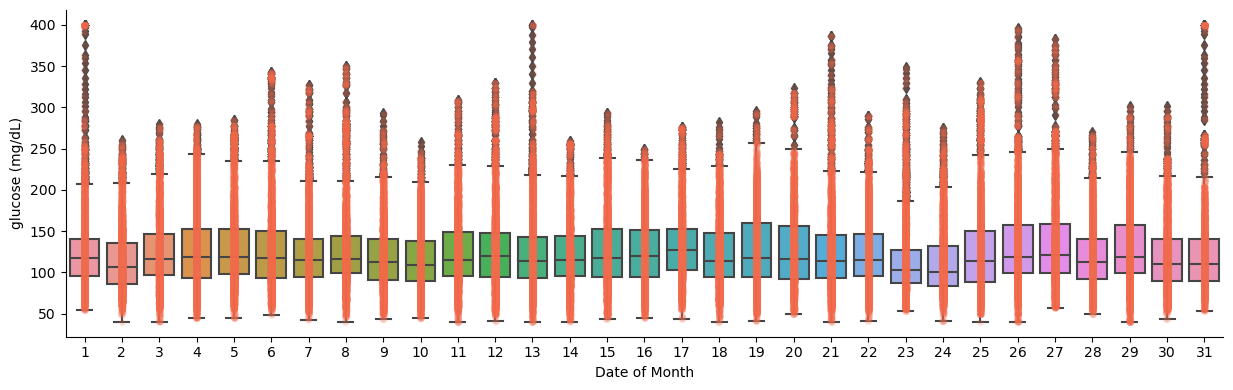

Patient ID:  11


In [ ]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Constants
DATA_PATH = r'' # specify path
EXTENSION = 'csv'
GLUCOSE_MIN = 39
GLUCOSE_MAX = 1000
GLUCOSE_CLAMP = 400
DAYS_ORDER = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
COLOR = '#F36B4D'

# Prepare file paths
files = glob.glob(os.path.join(DATA_PATH, f'*.{EXTENSION}'))
patient_unstrip_IDs = [os.path.basename(f).split('_entries', 1)[0] for f in files]
patient_IDs = [ele.lstrip('0') for ele in patient_unstrip_IDs]
df_id_files = pd.DataFrame({'id': patient_IDs, 'EntriesFileName': files})

def process_file(file_path):
    df = pd.read_csv(file_path, index_col=None, na_values=" null")
    df.index = pd.to_datetime(df["Timestamp"], format='%Y-%m-%d %H:%M:%S')
    df = df[~df.index.duplicated(keep='first')]
    df = df[(df['glucose'] > GLUCOSE_MIN) & (df['glucose'] < GLUCOSE_MAX)]
    df.loc[df['glucose'] > GLUCOSE_CLAMP, 'glucose'] = GLUCOSE_CLAMP
    df['Dateonly'] = df["Date"].str.split("/", n=2, expand=True)[2].astype(int)
    return df

def plot_data(df, x_col, y_col='glucose', x_label=None, aspect_ratio=18.7/8.27, order=None):
    print(df[[y_col, x_col]].groupby(x_col).describe())
    catplot = sns.catplot(x=x_col, y=y_col, kind="box", data=df, height=4, aspect=aspect_ratio, order=order)
    sns.stripplot(x=x_col, y=y_col, data=df, alpha=0.2, jitter=0.02, color=COLOR, order=order)
    catplot.set(xlabel=x_label if x_label else x_col, ylabel=f"{y_col} (mg/dL)")
    plt.show()

for i, f in enumerate(files):
    print("Patient ID: ", i)
    df = process_file(f)
    
    plot_data(df, x_col='DoW', x_label="Day", order=DAYS_ORDER)
    plot_data(df, x_col='Hour', x_label="Hour", aspect_ratio=25.7/8.27)
    plot_data(df, x_col='Month', x_label="Month")
    plot_data(df, x_col='Dateonly', x_label="Date of Month", aspect_ratio=25.7/8.27)
    
    print('=======' * 20)
    print('=======' * 20)


# Average statistics using timeseries breakdown on daily basis and classification based on gender

In [ ]:
path = r''  # specify data path
demographics_path = r''  # specify data path

# Read demographics data
df_demographics = pd.read_csv(DEMOGRAPHICS_PATH, index_col=None)

# List of files in data path
files = glob.glob(os.path.join(DATA_PATH, f'*.csv'))

# Extract patient IDs from filenames
patient_unstrip_IDs = [os.path.basename(f).split('_entries', 1)[0] for f in files]
patient_IDs = [ele.lstrip('0') for ele in patient_unstrip_IDs]
df_id_files = pd.DataFrame({'id': patient_IDs, 'EntriesFileName': files})

# Dictionary to store daily statistics
daily_stats = {
    'Monday': [],
    'Tuesday': [],
    'Wednesday': [],
    'Thursday': [],
    'Friday': [],
    'Saturday': [],
    'Sunday': []
}

demographics = []

for idx, f in enumerate(files):
    patient_id = int(df_id_files.id[idx])
    patient_demographic = df_demographics[df_demographics['id'] == patient_id]
    
    if not patient_demographic.empty:
        demographics.append(patient_demographic)

        print("Processing Patient ID:", idx)

        # Reading and processing files
        df = pd.read_csv(os.path.join(DATA_PATH, f), index_col=None, na_values=" null")
        df.index = pd.to_datetime(df["Timestamp"], format='%Y-%m-%d %H:%M:%S')
        df = df[~df.index.duplicated(keep='first')]
        df = df[(df['glucose'] > 39) & (df['glucose'] < 1000)]
        df.loc[df['glucose'] > 400, 'glucose'] = 400
        df['Dateonly'] = df["Date"].str.split("/", n=2, expand=True)[2].astype(int)

        # Storing daily statistics
        for day, stats_list in daily_stats.items():
            stats_list.append(pd.DataFrame(df['glucose'].loc[df['DoW'] == day]).describe().transpose())

print("Processing completed!")

In [16]:
monday = pd.concat(Monday)  # convert statistics to dataframe
monday.reset_index(drop=True, inplace=True)
tuesday = pd.concat(Tuesday)
tuesday.reset_index(drop=True, inplace=True)
wednesday = pd.concat(Wednesday)
wednesday.reset_index(drop=True, inplace=True)
thursday = pd.concat(Thursday)
thursday.reset_index(drop=True, inplace=True)
friday = pd.concat(Friday)
friday.reset_index(drop=True, inplace=True)
saturday = pd.concat(Saturday)
saturday.reset_index(drop=True, inplace=True)
sunday = pd.concat(Sunday)
sunday.reset_index(drop=True, inplace=True)

all_stats3 = pd.concat(demographics)
all_stats3.reset_index(drop=True, inplace=True)
all_stats3 = all_stats3.drop(all_stats3.tail(7).index)
all_stats3 = all_stats3.filter(
    ['id', 'height', 'weight', 'age', 'gender', 'country', 'DIYTech'], axis=1)

monday_statistics = pd.concat([all_stats3, monday], axis=1)
tuesday_statistics = pd.concat([all_stats3, tuesday], axis=1)
wednesday_statistics = pd.concat([all_stats3, wednesday], axis=1)
thursday_statistics = pd.concat([all_stats3, thursday], axis=1)
friday_statistics = pd.concat([all_stats3, friday], axis=1)
saturday_statistics = pd.concat([all_stats3, saturday], axis=1)
sunday_statistics = pd.concat([all_stats3, sunday], axis=1)

## Save daily output statistics for male and females

In [14]:
result = r'' # specify data path
    
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = "{:,.2f}".format

monday_stats_m = monday_statistics[(monday_statistics['gender'] == 'Male')]
monday_stats_m.reset_index(drop=True)
monday_stats_m.to_csv(os.path.join(result, "monday_stats_m.csv"))

monday_stats_f = monday_statistics[(monday_statistics['gender'] == 'Female')]
monday_stats_f.reset_index(drop=True)
monday_stats_f.to_csv(os.path.join(result, "monday_stats_f.csv"))

# Plot daily average statistics

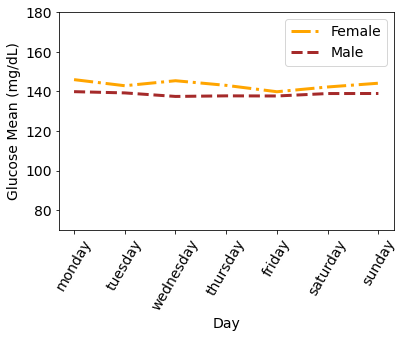

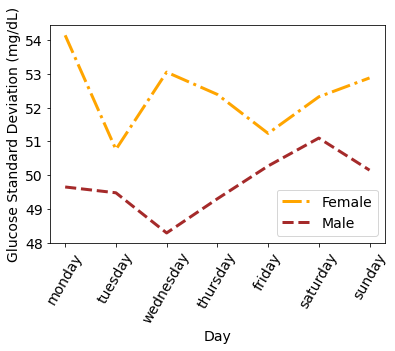

mean         data       days        std  Day_id
8   145.991885  stats_f.csv     monday  54.142251       0
1   139.903664  stats_m.csv     monday  49.648345       0
12  142.907360  stats_f.csv    tuesday  50.759602       1
5   139.275358  stats_m.csv    tuesday  49.476195       1
13  145.437042  stats_f.csv  wednesday  53.050468       2
6   137.489728  stats_m.csv  wednesday  48.286131       2
11  143.083965  stats_f.csv   thursday  52.389695       3
4   137.783317  stats_m.csv   thursday  49.298467       3
7   139.867508  stats_f.csv     friday  51.236093       4
0   137.716681  stats_m.csv     friday  50.270050       4
9   142.275482  stats_f.csv   saturday  52.319166       5
2   138.951860  stats_m.csv   saturday  51.097192       5
10  144.177155  stats_f.csv     sunday  52.878827       6
3   138.976382  stats_m.csv     sunday  50.146490       6

In [14]:
path = r''  # specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
days = [i.split('_', 1)[0] for i in files]

i = 0
mean = []
std = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean.append(df['mean'].mean())
    std.append(df['std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'days': days,
    'mean': mean,
    'std': std,
    'data': files_unstrip_IDs,
})

all_stat = pd.concat([stats], axis=1)

all_stat.sort_values('data', inplace=True, ascending=False)
all_stat.reset_index(drop=True, inplace=True)

#print(all_stat)

statt = all_stat[['mean', 'data', 'days', 'std']].sort_values('data')

sorter = [
    'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
    'sunday'
]
sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['Day_id'] = statt.index
statt['Day_id'] = statt['days'].map(sorterIndex)

statt.sort_values('Day_id', inplace=True)

da_f = statt[statt['data'] == 'stats_f.csv']
da_m = statt[statt['data'] == 'stats_m.csv']

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

plt.ylim(70, 180)

ax = plt.plot(da_f['days'],
              da_f['mean'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(da_m['days'],
              da_m['mean'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Day')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

ax = plt.plot(da_f['days'],
              da_f['std'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(da_m['days'],
              da_m['std'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Day')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=60)
plt.show()
statt

# Plot hourly average statistics

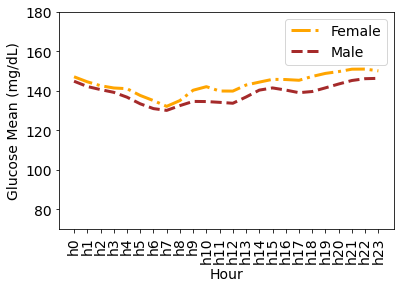

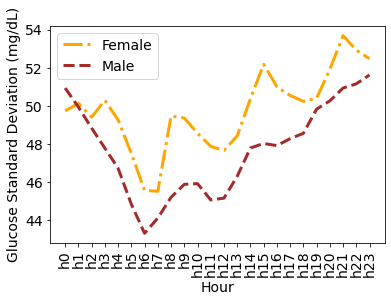

hours      mean_m      std_m      mean_f      std_f  hour_id
0     h0  144.852227  50.932793  147.095983  49.733986        0
11    h1  142.171011  49.933113  144.552438  50.124410        1
16    h2  140.616969  48.828701  142.582262  49.404791        2
17    h3  139.231543  47.776770  141.429448  50.288675        3
18    h4  136.781015  46.717217  141.074636  49.256849        4
19    h5  133.424248  44.829261  137.647481  47.497692        5
20    h6  130.993650  43.303572  135.052980  45.556819        6
21    h7  130.090866  44.103694  132.127052  45.511040        7
22    h8  132.510147  45.196226  135.067054  49.458582        8
23    h9  134.627697  45.873938  140.293890  49.357249        9
1    h10  134.565108  45.912863  142.085692  48.562146       10
2    h11  134.163281  45.056089  139.895787  47.866445       11
3    h12  133.701878  45.149834  139.855217  47.652037       12
4    h13  136.873126  46.297839  142.922810  48.420473       13
5    h14  140.348531  47.786282  144.396029  50.372257       14
6    h15  141.456281  48.021158  145.793860  52.179375       15
7    h16  140.373190  47.908177  145.698111  50.999424       16
8    h17  139.049034  48.275933  145.324948  50.541866       17
9    h18  139.643625  48.553425  147.268054  50.234086       18
10   h19  141.499595  49.826420  148.809239  50.401923       19
12   h20  143.440169  50.258265  149.727574  51.916420       20
13   h21  145.219863  50.933492  150.934921  53.686512       21
14   h22  146.127541  51.153669  150.991263  52.922548       22
15   h23  146.305825  51.623383  150.091582  52.475283       23

In [15]:
path = r''  # specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
hours = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'hours': hours,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('hours')

#all_stat.sort_values('data',inplace=True, ascending=False)
#all_stat.reset_index(drop=True, inplace=True)

#print(all_stat)

sorter = [
    'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11',
    'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21',
    'h22', 'h23'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['hour_id'] = statt.index
statt['hour_id'] = statt['hours'].map(sorterIndex)

statt.sort_values('hour_id', inplace=True)

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})
plt.ylim(70, 180)
ax = plt.plot(statt['hours'],
              statt['mean_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['hours'],
              statt['mean_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Hour')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

ax = plt.plot(statt['hours'],
              statt['std_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['hours'],
              statt['std_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Hour')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()
statt

# Average Statistics based on Monthly Breakdown 

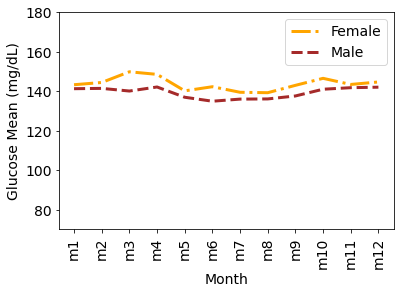

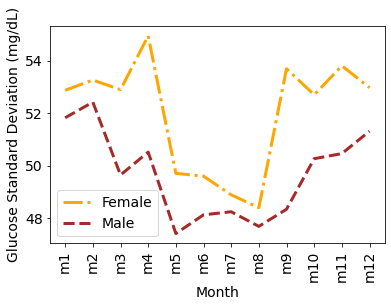

months      mean_m      std_m      mean_f      std_f  month_id
4      m1  141.192594  51.826648  143.203621  52.875886       0.0
5      m2  141.353352  52.422430  144.335957  53.265938       1.0
6      m3  140.008330  49.642569  149.749437  52.898858       2.0
7      m4  142.054451  50.515346  148.440590  54.952709       3.0
8      m5  136.867703  47.406671  140.101919  49.704659       4.0
9      m6  134.857991  48.120864  142.189267  49.596360       5.0
10     m7  135.926744  48.238615  139.381140  48.885666       6.0
11     m8  136.015070  47.680019  139.163811  48.392636       7.0
12     m9  137.513401  48.334447  142.887962  53.699653       8.0
1     m10  140.925122  50.264295  146.438273  52.703304       9.0
2     m11  141.704479  50.458939  143.341576  53.810140      10.0
3     m12  141.960129  51.314551  144.598872  52.975258      11.0
0      m0         NaN        NaN         NaN        NaN       NaN

In [16]:
path = r''  # specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
months = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'months': months,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('months')

sorter = [
    'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['month_id'] = statt.index
statt['month_id'] = statt['months'].map(sorterIndex)

statt.sort_values('month_id', inplace=True)

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

plt.ylim(70, 180)

ax = plt.plot(statt['months'],
              statt['mean_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['months'],
              statt['mean_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Month')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(6, 4))
plt.rcParams.update({'font.size': 14})

ax = plt.plot(statt['months'],
              statt['std_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['months'],
              statt['std_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Month')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()

statt

# Average Statistics based on Date of Month Breakdown 

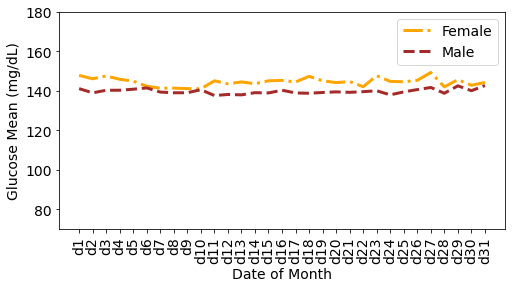

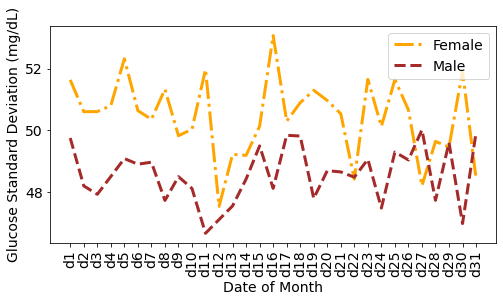

date      mean_m      std_m      mean_f      std_f  date_id
10   d1  141.097574  49.747564  147.808991  51.632453        0
21   d2  138.977394  48.195104  146.090871  50.600743        1
24   d3  140.264595  47.922889  147.507017  50.604757        2
25   d4  140.289946  48.499641  145.831012  50.799595        3
26   d5  140.802682  49.082583  144.879594  52.316367        4
27   d6  141.449427  48.898424  142.330616  50.635910        5
28   d7  139.353886  48.964342  141.314241  50.351607        6
29   d8  138.998952  47.724005  141.349308  51.331425        7
30   d9  139.021585  48.495353  141.116513  49.822438        8
0   d10  140.549584  48.111766  140.987706  50.032479        9
1   d11  137.612282  46.659015  145.049207  51.974526       10
2   d12  138.138047  47.103864  143.531049  47.528500       11
3   d13  137.950729  47.546629  144.496205  49.218637       12
4   d14  139.052079  48.416841  143.571786  49.185489       13
5   d15  138.921982  49.492656  145.057254  50.129761       14
6   d16  140.292547  48.114491  145.258200  53.068125       15
7   d17  138.924124  49.836594  144.474647  50.293543       16
8   d18  138.753044  49.812558  147.309927  50.891879       17
9   d19  139.155569  47.789203  145.073723  51.294844       18
11  d20  139.457514  48.689612  144.140146  50.965186       19
12  d21  139.229078  48.648334  144.672942  50.533109       20
13  d22  139.565331  48.477733  142.073048  48.415004       21
14  d23  140.004107  49.056731  147.636879  51.649730       22
15  d24  137.960340  47.477060  144.748182  50.124898       23
16  d25  139.451512  49.294095  144.574116  51.641608       24
17  d26  140.617961  49.036697  145.286779  50.660301       25
18  d27  141.684348  50.012676  149.286062  48.200562       26
19  d28  138.760828  47.727736  141.999581  49.637506       27
20  d29  142.513531  49.596798  145.614747  49.459739       28
22  d30  140.051783  46.974306  142.785021  51.911241       29
23  d31  142.661796  49.924660  144.233312  48.441464       30

In [17]:
path = r''  # specify data path

extension = 'csv'

os.chdir(path)

files = [i for i in glob.glob('*.{}'.format(extension))]
files_unstrip_IDs = [i.split('_', 1)[1] for i in files]
date = [i.split('_', 1)[0] for i in files]

i = 0
mean_m = []
std_m = []

mean_f = []
std_f = []

for f in files:
    p = os.path.join(path, f)

    # reading and processing files
    df = pd.read_csv(p, index_col=None, na_values=" null")

    mean_m.append(df.loc[df['gender'] == 'Male', 'mean'].mean())
    std_m.append(df.loc[df['gender'] == 'Male', 'std'].mean())

    mean_f.append(df.loc[df['gender'] == 'Female', 'mean'].mean())
    std_f.append(df.loc[df['gender'] == 'Female', 'std'].mean())

    i = i + 1

stats = pd.DataFrame({
    'date': date,
    'mean_m': mean_m,
    'std_m': std_m,
    'mean_f': mean_f,
    'std_f': std_f
})

statt = pd.concat([stats], axis=1).sort_values('date')

#all_stat.sort_values('data',inplace=True, ascending=False)
#all_stat.reset_index(drop=True, inplace=True)

#print(all_stat)

sorter = [
    'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12',
    'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22',
    'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'
]

sorterIndex = dict(zip(sorter, range(len(sorter))))

statt['date_id'] = statt.index
statt['date_id'] = statt['date'].map(sorterIndex)

statt.sort_values('date_id', inplace=True)

## Plotting data

# Designate a figure size and font size
plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 14})

plt.ylim(70, 180)

ax = plt.plot(statt['date'],
              statt['mean_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['date'],
              statt['mean_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Date of Month')
plt.ylabel('Glucose Mean (mg/dL)')
plt.xticks(rotation=90)
plt.show()

##

plt.figure(figsize=(8, 4))
plt.rcParams.update({'font.size': 14})

ax = plt.plot(statt['date'],
              statt['std_f'],
              color='orange',
              linestyle='-.',
              linewidth=3)
ax = plt.plot(statt['date'],
              statt['std_m'],
              color='brown',
              linestyle='--',
              linewidth=3)

plt.legend(['Female', 'Male'])
plt.xlabel('Date of Month')
plt.ylabel('Glucose Standard Deviation (mg/dL)')
plt.xticks(rotation=90)
plt.show()

statt